# Исследование объявлений о продаже квартир
<a id='intro'></a>

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков-в-данных" data-toc-modified-id="Обработка-пропусков-в-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков в данных</a></span></li><li><span><a href="#Переопределение-типов-данных" data-toc-modified-id="Переопределение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Переопределение типов данных</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Расчёт-цены-квадратного-метра" data-toc-modified-id="Расчёт-цены-квадратного-метра-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Расчёт цены квадратного метра</a></span></li><li><span><a href="#Расчёт-дня-недели,-месяца-и-года-публикации-объявления" data-toc-modified-id="Расчёт-дня-недели,-месяца-и-года-публикации-объявления-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Расчёт дня недели, месяца и года публикации объявления</a></span></li><li><span><a href="#Расчёт-этажа-квартиры-(варианты-—-первый,-последний,-другой)" data-toc-modified-id="Расчёт-этажа-квартиры-(варианты-—-первый,-последний,-другой)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Расчёт этажа квартиры (варианты — первый, последний, другой)</a></span></li><li><span><a href="#Расчёт-отношения-жилой-и-общей-площади,-кухни-к-общей-площади" data-toc-modified-id="Расчёт-отношения-жилой-и-общей-площади,-кухни-к-общей-площади-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Расчёт отношения жилой и общей площади, кухни к общей площади</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-площади,-цены,-числа-комнат,-высоты-потолков" data-toc-modified-id="Анализ-площади,-цены,-числа-комнат,-высоты-потолков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Анализ площади, цены, числа комнат, высоты потолков</a></span><ul class="toc-item"><li><span><a href="#Оценка-по-общей-площади" data-toc-modified-id="Оценка-по-общей-площади-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Оценка по общей площади</a></span></li><li><span><a href="#Оценка-по-цене" data-toc-modified-id="Оценка-по-цене-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Оценка по цене</a></span></li><li><span><a href="#Оценка-по-количеству-комнат" data-toc-modified-id="Оценка-по-количеству-комнат-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Оценка по количеству комнат</a></span></li><li><span><a href="#Оценка-по-высоте-потолков" data-toc-modified-id="Оценка-по-высоте-потолков-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Оценка по высоте потолков</a></span></li></ul></li><li><span><a href="#Анализ-времени-продажи-квартиры" data-toc-modified-id="Анализ-времени-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Анализ времени продажи квартиры</a></span></li><li><span><a href="#Обработка-редких-значений-и-выбросов" data-toc-modified-id="Обработка-редких-значений-и-выбросов-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Обработка редких значений и выбросов</a></span></li><li><span><a href="#Оценка-факторов,-имеющих-наибольшее-влияние-на-стоимость-квартиры" data-toc-modified-id="Оценка-факторов,-имеющих-наибольшее-влияние-на-стоимость-квартиры-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Оценка факторов, имеющих наибольшее влияние на стоимость квартиры</a></span></li><li><span><a href="#Анализ-для-10-населённых-пунктов-с-наибольшим-числом-объявлений" data-toc-modified-id="Анализ-для-10-населённых-пунктов-с-наибольшим-числом-объявлений-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Анализ для 10 населённых пунктов с наибольшим числом объявлений</a></span></li><li><span><a href="#Поиск-квартир-в-центре-Санкт-Петербурга" data-toc-modified-id="Поиск-квартир-в-центре-Санкт-Петербурга-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Поиск квартир в центре Санкт-Петербурга</a></span></li><li><span><a href="#Анализ-квартир-в-центре-Санкт-Петербурга-и-сопоставление-с-выводами-по-всей-базе" data-toc-modified-id="Анализ-квартир-в-центре-Санкт-Петербурга-и-сопоставление-с-выводами-по-всей-базе-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Анализ квартир в центре Санкт-Петербурга и сопоставление с выводами по всей базе</a></span><ul class="toc-item"><li><span><a href="#Центр-СПб:-оценка-по-общей-площади" data-toc-modified-id="Центр-СПб:-оценка-по-общей-площади-4.7.1"><span class="toc-item-num">4.7.1&nbsp;&nbsp;</span>Центр СПб: оценка по общей площади</a></span></li><li><span><a href="#Центр-СПб:-оценка-по-цене" data-toc-modified-id="Центр-СПб:-оценка-по-цене-4.7.2"><span class="toc-item-num">4.7.2&nbsp;&nbsp;</span>Центр СПб: оценка по цене</a></span></li><li><span><a href="#Центр-СПб:-оценка-по-количеству-комнат" data-toc-modified-id="Центр-СПб:-оценка-по-количеству-комнат-4.7.3"><span class="toc-item-num">4.7.3&nbsp;&nbsp;</span>Центр СПб: оценка по количеству комнат</a></span></li><li><span><a href="#Центр-СПб:-оценка-по-высоте-потолков" data-toc-modified-id="Центр-СПб:-оценка-по-высоте-потолков-4.7.4"><span class="toc-item-num">4.7.4&nbsp;&nbsp;</span>Центр СПб: оценка по высоте потолков</a></span></li><li><span><a href="#Центр-СПб:-оценка-факторов,-имеющих-наибольшее-влияние-на-стоимость-квартиры" data-toc-modified-id="Центр-СПб:-оценка-факторов,-имеющих-наибольшее-влияние-на-стоимость-квартиры-4.7.5"><span class="toc-item-num">4.7.5&nbsp;&nbsp;</span>Центр СПб: оценка факторов, имеющих наибольшее влияние на стоимость квартиры</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файла
[В начало](#intro)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
try:
    df = pd.read_csv("Y:/Обучение цифровой профессии/Аналитик данных/01-03 Исследовательский анализ данных/real_estate_data.csv")
except:
    df = pd.read_csv("/datasets/real_estate_data.csv")
    
print("Первые 5 строк датафрейма:")
display(df.head())

Первые 5 строк датафрейма:


,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


В качестве разделителя столбцов данных в исходном файле применен не пробел, а символ "\\".</br>
Заменим разделитель, выведем общую информацию о датафрейме.

Также для удобства работы переименуем столбцы:</br>
- "cityCenters_nearest" в "city_сenters_nearest",</br> 
- "parks_around3000" в "parks_around_3_km",</br>
- "ponds_around3000" в "ponds_around_3_km".</br>

In [3]:
try:
    df = pd.read_csv("Y:/Обучение цифровой профессии/Аналитик данных/01-03 Исследовательский анализ данных/real_estate_data.csv", sep='\t')
except:
    df = pd.read_csv("/datasets/real_estate_data.csv", sep='\t')

df = df.rename(
    columns={
        'cityCenters_nearest': 'city_сenters_nearest',
        'parks_around3000': 'parks_around_3_km',
        'ponds_around3000': 'ponds_around_3_km',
    })

print("Первые 5 строк датафрейма:")
# Изменяем настройки отображения столбцов в Пандасе, чтобы выводились все столбцы:
pd.set_option('display.max_columns', None)
display(df.head())

print("Общая информация о датафрейме:")
df.info()
print("=============================================================================")
print("Разброс значений, максимум, минимум, среднее и медиана в столбцах датафрейма:")
df.describe()

Первые 5 строк датафрейма:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3_km,parks_nearest,ponds_around_3_km,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  o

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_сenters_nearest,parks_around_3_km,parks_nearest,ponds_around_3_km,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Датафрейм представляет собой таблицу из 21 столбца и 23699 строки (считая нулевую).</br>
В столбцах используются значения различных типов (строки, вещественные числа, логические значения).
Для ряда значений автоматически определенный тип неверен (например, даты публикации объявлений в столбце "first_day_exposition" должны быть в формате дата/время, а не строками).
Имеются столбцы с пропусками данных и значения, правдоподобность которых в дальнейшем необходимо проверить (например, минимальное количество комнат - 0).</br>
Требуется предобработка данных.


## Предобработка данных
[В начало](#intro)

### Обработка пропусков в данных
[В начало](#intro)</br>

Оценим долю пропущенных значений среди всех данных: 

In [4]:
df.isna().mean()*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
city_сenters_nearest    23.287902
parks_around_3_km       23.283683
parks_nearest           65.909954
ponds_around_3_km       23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

Cделаем предположение, что отсутствие данных в столбце **balcony** в отдельных квартирах означает, что балконов там просто нет - заменяем пропуски нулями. Аналогичное предположение сделаем и для ячеек столбца **is_apartment**: считаем, что пропуски в этом случае означают, что мы не имеем дело с апартаментами -  также заменяем пропуски нулями.</br>

Для того, чтобы в дальнейшем исследовании не потерять большой массив информации из-за отсутствия данных во второстепенном столбце **ceiling_height**, заменяем пропуски в этом столбце медианным значением высоты потолков по имеющимся данным.</br>

Считаем, что для остальных столбцов замена пропусков на данном этапе нецелесообразна: можно "не угадать" с корректными значениями.</br>
Удалять строки с пропусками также пока не будем чтобы не потерять важные для дальнейшего исследования данные.

In [5]:
# Заменяем пропуски в столбцах на нули:
df['balcony'] = df['balcony'].fillna(0) 
df['is_apartment'] = df['is_apartment'].fillna(0)
# Заменяем пропуски в столбце на медианное значение:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

print('Доля пропущенных значений среди всех данных обновленного датафрейма')
print(df.isna().mean()*100)

# Подсчитываем дубликаты в датафрейме:
df.duplicated().sum()

Доля пропущенных значений среди всех данных обновленного датафрейма
total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height           0.000000
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment             0.000000
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                  0.000000
locality_name            0.206760
airports_nearest        23.384953
city_сenters_nearest    23.287902
parks_around_3_km       23.283683
parks_nearest           65.909954
ponds_around_3_km       23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64


0

Явных дубликатов в датафрейме не обнаружено.

### Переопределение типов данных
[В начало](#intro)</br>

Оценивая автоматически определенные типы данных в столбцах таблицы, заключаем, что:</br>
- 0   total_images            int64    - тип определен верно</br>
- 1   last_price              float64  - тип определен верно</br>
- 2   total_area              float64  - тип определен верно</br>
- **3   first_day_exposition  object   - тип определен НЕверно (это дата, а не строка: нужен datetime64)** - меняем</br> 
- 4   rooms                   int64    - тип определен верно</br>  
- 5   ceiling_height          float64  - тип определен верно</br>
- **6   floors_total          float64  - тип определен НЕверно (это число этажей, т.е. целое: нужен int64)** - оставляем без изменений (т.к. есть NaN)</br>
- 7   living_area             float64  - тип определен верно</br>
- 8   floor                   int64    - тип определен верно</br>  
- **9   is_apartment          object   - тип определен НЕверно (это признак, а не строка: нужен bool)** - меняем</br> 
- 10  studio                  bool     - тип определен верно</br>  
- 11  open_plan               bool     - тип определен верно</br> 
- 12  kitchen_area            float64  - тип определен верно</br>
- **13  balcony               float64  - тип определен НЕверно (это число балконов, т.е. целое: нужен int64)** - меняем</br>
- 14  locality_name           object   - тип определен верно</br> 
- 15  airports_nearest        float64  - тип определен верно</br> 
- 16  city_centers_nearest    float64  - тип определен верно</br> 
- **17  parks_around_3_km      float64  - тип определен НЕверно (это число парков, т.е. целое: нужен int64)** - оставляем без изменений (т.к. есть NaN)</br>
- 18  parks_nearest           float64  - тип определен верно</br>
- **19  ponds_around_3_km      float64  - тип определен НЕверно (это число прудов, т.е. целое: нужен int64)** - оставляем без изменений (т.к. есть NaN)</br>
- 20  ponds_nearest           float64  - тип определен верно</br>
- **21  days_exposition       float64  - тип определен НЕверно (это число дней, т.е. целое: нужен int64)** - оставляем без изменений (т.к. есть NaN)</br>

Переопределяем типы данных в перечисленных столбцах.


In [6]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
df['is_apartment'] = df['is_apartment'].astype('bool')
df['balcony'] = df['balcony'].astype('int64')

# Причина, по которой пропуски оставлены для части столбцов, указана в п.2.1.
# Смена типа данных возможна, только если в столбце отсутствуют пропуски NaN, 
# - иначе выдается сообщение об ошибке "ValueError: Cannot convert non-finite values (NA or inf) to integer".
# Для примера возможно раскомментировать любую из следующих строк и запустить код:
#df['floors_total'] = df['floors_total'].astype('Int64')
df['parks_around_3_km'] = df['parks_around_3_km'].astype('Int8')
df['ponds_around_3_km'] = df['ponds_around_3_km'].astype('Int8')
df['days_exposition'] = df['days_exposition'].round().astype('Int64')
df['days_exposition'] = df['days_exposition'].astype('Int8')

print("Общая информация о датафрейме после предобработки:")
df.info()

Общая информация о датафрейме после предобработки:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          2

Типы данных переопределены в 3 столбцах: first_day_exposition object, is_apartment, balcony.</br>
Для столбцов floors_total, parks_around_3km, ponds_around_3km, days_exposition оставлен прежний (автоопределенный) тип данных.

## Расчёты и добавление результатов в таблицу
[В начало](#intro)

### Расчёт цены квадратного метра
[В начало](#intro)

Называем столбец с данными о цене квадратного метра **price_per_square_meter** и добавляем соответствующие значения в датафрем (размерность столбца "р. / кв.м.").

In [7]:
df['price_per_square_meter'] = df['last_price'] / df['total_area']

print("Первые 5 строк обновленного датафрейма:")
display(df.head())

Первые 5 строк обновленного датафрейма:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3_km,parks_nearest,ponds_around_3_km,ponds_nearest,days_exposition,price_per_square_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,46,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,-88,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000


### Расчёт дня недели, месяца и года публикации объявления
[В начало](#intro)

Называем и добавляем к датафрейму столбцы с данными публикации объявления:</br>
- день недели - **week_day**;</br>
- месяц       - **month**;</br>
- год         - **year**.</br>

In [8]:
df['week_day'] = df['first_day_exposition'].dt.weekday
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year

print("Первые 5 строк обновленного датафрейма:")
display(df.head())

Первые 5 строк обновленного датафрейма:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3_km,parks_nearest,ponds_around_3_km,ponds_nearest,days_exposition,price_per_square_meter,week_day,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,46,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,-88,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000,1,6,2018


### Расчёт этажа квартиры (варианты — первый, последний, другой)

[В начало](#intro)

Добавляем в таблицу столбец **floor_option** (вариант этажа):</br>
- "первый" (для всех, у которых значения столбца floor = 1),</br> 
- "последний" (если значения столбца floor и floors_total равны, но floor не равен 1),</br> 
- "другой" (во всех остальных случаях).

In [9]:
# Создадим функцию, которая категоризирует данные floor как "первый / последний / другой":   
def f_floor_option(row):
    x = row['floor']
    y = row['floors_total']
    if x == 1: return 'первый'
    elif (x == y) and (x != 1): return 'последний'
    else: return 'другой'
 
# Создадим столбец floor_option с категориями "первый / последний / другой":
df['floor_option'] = df.apply(f_floor_option, axis=1)

print("Первые 5 строк обновленного датафрейма:")
display(df.head())

Первые 5 строк обновленного датафрейма:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3_km,parks_nearest,ponds_around_3_km,ponds_nearest,days_exposition,price_per_square_meter,week_day,month,year,floor_option
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,46,92785.714286,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,-88,408176.100629,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000,1,6,2018,другой


### Расчёт отношения жилой и общей площади, кухни к общей площади

[В начало](#intro)

Добавляем в таблицу столбец **living_ratio** (отношение жилой площади к общей площади), данные в котором заполняем по формуле:</br>
**living_ratio** = **living_area** / **total_area**</br> 

Добавляем в таблицу столбец **kitchen_ratio** (отношение площади кухни к общей площади), данные в котором заполняем по формуле:</br>
**kitchen_ratio** = **kitchen_area** / **total_area**</br> 

In [10]:
df['living_ratio'] = df['living_area'] / df['total_area']
df['kitchen_ratio'] = df['kitchen_area'] / df['total_area']

print("Первые 5 строк обновленного датафрейма:")
display(df.head())

Первые 5 строк обновленного датафрейма:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3_km,parks_nearest,ponds_around_3_km,ponds_nearest,days_exposition,price_per_square_meter,week_day,month,year,floor_option,living_ratio,kitchen_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,46,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,-88,408176.100629,4,7,2015,другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000,1,6,2018,другой,0.320000,0.410000


## Исследовательский анализ данных
[В начало](#intro)

### Анализ площади, цены, числа комнат, высоты потолков

[В начало](#intro)

Определяем, какие факторы больше всего влияют на стоимость квартиры: анализируем данные по общей площади, цене, числу комнат и высоте потолков. Построим гистограммы для этих данных.</br>

#### Оценка по общей площади

[В начало](#intro)

In [11]:
print("5 первых и 5 последних строк таблицы, отфильтрованной по возрастанию площади:")
display(df.sort_values(by='total_area').head())
display(df.sort_values(by='total_area').tail())

5 первых и 5 последних строк таблицы, отфильтрованной по возрастанию площади:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3_km,parks_nearest,ponds_around_3_km,ponds_nearest,days_exposition,price_per_square_meter,week_day,month,year,floor_option,living_ratio,kitchen_ratio
19904,4,2400000.0,12.0,2017-07-19,1,2.55,5.0,10.0,2,False,False,False,NaN,0,Санкт-Петербург,21314.0,964.0,1,886.0,2,45.0,-56,200000.000000,2,7,2017,другой,0.833333,NaN
17961,3,1400000.0,13.0,2017-12-03,1,2.60,9.0,NaN,1,False,False,False,NaN,0,Санкт-Петербург,14350.0,15945.0,0,NaN,1,185.0,-102,107692.307692,6,12,2017,первый,NaN,NaN
19546,3,1850000.0,13.0,2019-03-11,1,3.40,5.0,NaN,2,False,False,False,NaN,0,Санкт-Петербург,24915.0,5483.0,1,644.0,0,NaN,24,142307.692308,0,3,2019,другой,NaN,NaN
19807,0,3800000.0,13.0,2018-07-04,1,2.65,5.0,10.0,3,False,False,False,NaN,0,Санкт-Петербург,21302.0,1242.0,1,592.0,3,27.0,9,292307.692308,2,7,2018,другой,0.769231,NaN
19558,2,1686000.0,13.2,2018-12-17,1,2.65,5.0,NaN,1,False,False,False,NaN,0,Санкт-Петербург,19891.0,4165.0,1,361.0,1,155.0,19,127727.272727,0,12,2018,первый,NaN,NaN


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3_km,parks_nearest,ponds_around_3_km,ponds_nearest,days_exposition,price_per_square_meter,week_day,month,year,floor_option,living_ratio,kitchen_ratio
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14,110169.491525,3,2,2019,другой,0.693220,0.169492
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7.0,258.0,5,False,False,False,70.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,111,485436.893204,0,12,2017,другой,0.417476,0.113269
3117,19,140000000.0,631.0,2019-03-30,7,2.65,5.0,NaN,5,False,False,False,60.0,0,Санкт-Петербург,25707.0,4972.0,0,NaN,2,210.0,<NA>,221870.047544,5,3,2019,последний,NaN,0.095087
12859,20,140000000.0,631.2,2019-04-09,7,3.90,4.0,322.3,4,False,False,False,19.5,1,Санкт-Петербург,25707.0,4972.0,0,NaN,2,210.0,<NA>,221799.746515,1,4,2019,последний,0.510615,0.030894
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106,466666.666667,2,12,2017,последний,0.455222,0.124444


Гистограмма по общей площади (выборка от 0 до 900 кв.м.)


<AxesSubplot:>

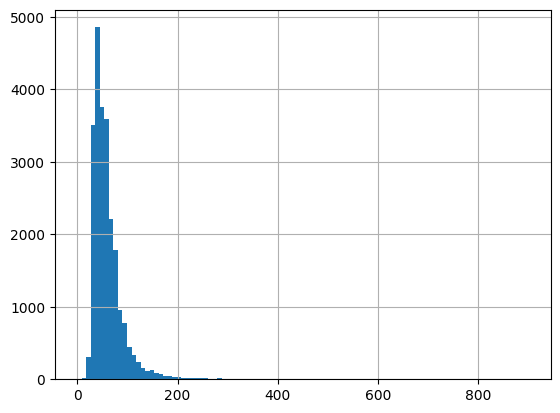

In [12]:
print("Гистограмма по общей площади (выборка от 0 до 900 кв.м.)")
df["total_area"].hist(bins=100, range=(0, 900))

Гистограмма по общей площади (выборка от 12 до 200)


<AxesSubplot:>

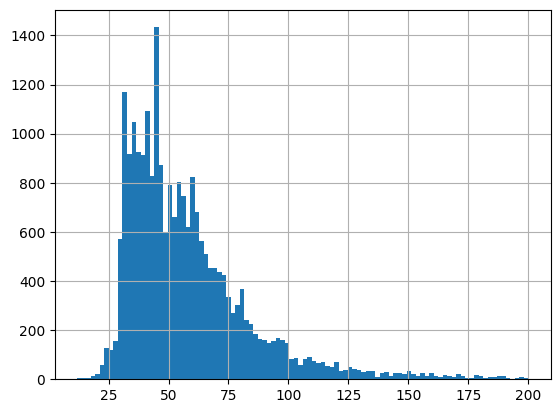

In [13]:
print("Гистограмма по общей площади (выборка от 12 до 200)")
df["total_area"].hist(bins=100, range=(12, 200))

**Самая маленькая квартира** имеет общую площадь 12 кв.м. и стоит 2,4 млн.р. Квартира эта однокомнатная с высотой потолков 2,55 м. Есть квартиры и больше по площади, но при этом дешевле.</br>
**Самый просторный пентхауз** расположен на 25-м этаже. Он в 75 раз крупнее и в 175 раз дороже самой скромной квартиры - имеет площадь 900 кв.м. и стоит 420,0 млн.р. В этом пентхаузе 12 комнат с потоками 2,8 м.</br>
**Наибольшее количество квартир имеет площадь** от 20 до 150 кв.м.

#### Оценка по цене

[В начало](#intro)

In [14]:
print("5 первых и 5 последних строк таблицы, отфильтрованной по цене:")
display(df.sort_values(by='last_price').head())
display(df.sort_values(by='last_price').tail())

5 первых и 5 последних строк таблицы, отфильтрованной по цене:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3_km,parks_nearest,ponds_around_3_km,ponds_nearest,days_exposition,price_per_square_meter,week_day,month,year,floor_option,living_ratio,kitchen_ratio
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8,111.834862,2,3,2019,последний,0.293578,0.371560
17456,7,430000.0,30.4,2019-04-22,1,2.65,2.0,16.0,1,False,False,False,6.0,0,Сланцы,NaN,NaN,<NA>,NaN,<NA>,NaN,<NA>,14144.736842,0,4,2019,первый,0.526316,0.197368
14911,5,430000.0,54.0,2018-06-26,2,2.65,3.0,NaN,3,False,False,False,NaN,0,посёлок станции Свирь,NaN,NaN,<NA>,NaN,<NA>,NaN,44,7962.962963,1,6,2018,последний,NaN,NaN
16274,18,440000.0,40.0,2018-07-10,1,2.65,5.0,NaN,1,False,False,False,NaN,0,деревня Старополье,NaN,NaN,<NA>,NaN,<NA>,NaN,45,11000.000000,1,7,2018,первый,NaN,NaN
17676,0,450000.0,36.5,2018-02-01,1,2.65,5.0,17.3,4,False,False,False,8.5,1,деревня Ям-Тесово,NaN,NaN,<NA>,NaN,<NA>,NaN,120,12328.767123,3,2,2018,другой,0.473973,0.232877


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3_km,parks_nearest,ponds_around_3_km,ponds_nearest,days_exposition,price_per_square_meter,week_day,month,year,floor_option,living_ratio,kitchen_ratio
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7.0,258.0,5,False,False,False,70.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,111,4.854369e+05,0,12,2017,другой,0.417476,0.113269
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7.0,95.0,5,False,False,False,40.0,0,Санкт-Петербург,23011.0,1197.0,3,519.0,3,285.0,-23,1.736842e+06,2,4,2018,другой,0.500000,0.210526
14706,15,401300000.0,401.0,2016-02-20,5,2.65,9.0,204.0,9,False,False,False,24.0,3,Санкт-Петербург,21912.0,2389.0,1,545.0,1,478.0,-119,1.000748e+06,5,2,2016,последний,0.508728,0.059850
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106,4.666667e+05,2,12,2017,последний,0.455222,0.124444
12971,19,763000000.0,400.0,2017-09-30,7,2.65,10.0,250.0,10,False,False,False,NaN,2,Санкт-Петербург,25108.0,3956.0,1,530.0,3,756.0,33,1.907500e+06,5,9,2017,последний,0.625000,NaN


Гистограмма по цене (выборка от 0 до 763 млн.р.)


<AxesSubplot:>

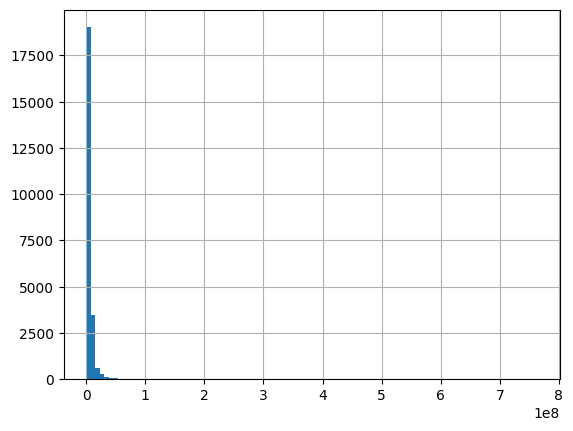

In [15]:
print("Гистограмма по цене (выборка от 0 до 763 млн.р.)")
df["last_price"].hist(bins=100, range=(0, 763000000))

Гистограмма по цене (выборка от 1 до 20 млн.р.)


<AxesSubplot:>

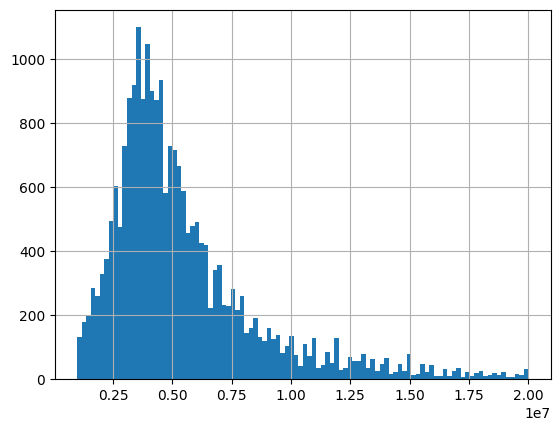

In [16]:
print("Гистограмма по цене (выборка от 1 до 20 млн.р.)")
df["last_price"].hist(bins=100, range=(1000000, 20000000))

**Самая недорогая квартира** стоит 12 190 р. и имеет общую площадь 109 кв.м. (2 комнаты, потолки 2,75 м) - очевидно, что в указании цены допущена ошибка (возможно, истинная цена 12,19 млн.р.). Второе место по минимальной цене делят две квартиры за 430 тыс. р. с площадями 30,4 и 54,0 кв.м., (1 и 2 комнатная, высота потолков - медианное значение 2,65 м).</br>
**Самый дорогой объект** (пентхауз на 10-м этаже) продавался за 763 млн.р.: имел площадь 400 кв.м., 7 комнат, высота потолков - медианное значение 2,65 м.</br>
**Цена наибольшего количества квартир** находится в диапазоне от 0,43 до 17,5 млн.р.

#### Оценка по количеству комнат

[В начало](#intro)

In [17]:
# Создаем новую таблицу из строк исходного датафрейма, в которых указано, что комнат ноль:
df_zero_rooms = df[df['rooms'] == 0].copy()
print(f"Количество квартир, для которых в таблице указано, что комнат ноль: {(len(df_zero_rooms))} штук, что составляет {round(((len(df_zero_rooms)) / (len(df))*100), 2)}% от всех квартир,")
print(f"при этом самая большая квартира имеет площадь {(df_zero_rooms['total_area'].max())} кв.м., а самая маленькая - {(df_zero_rooms['total_area'].min())} кв.м.")
print()
print("5 первых и 5 последних строк отсортированной по цене таблицы, для которых указано, что комнат ноль:")
display(df_zero_rooms.sort_values(by='last_price').head())
display(df_zero_rooms.sort_values(by='last_price').tail())
print()
print('===================================================================================================================')
print()
# Создаем новую таблицу из строк исходного датафрейма, в которых указано, что комнат не ноль:
df_not_zero_rooms = df.query('rooms != 0').copy()
print(f"Среди квартир с количеством комнат, отличном от нуля, самая большая квартира имеет площадь {(df_not_zero_rooms['total_area'].max())} кв.м., а самая маленькая - {(df_not_zero_rooms['total_area'].min())} кв.м.")
print()
print("5 первых и 5 последних строк отсортированной по цене таблицы, для которых указано, что комнат не ноль:")
display(df_not_zero_rooms.sort_values(by='last_price').head())
display(df_not_zero_rooms.sort_values(by='last_price').tail())

Количество квартир, для которых в таблице указано, что комнат ноль: 197 штук, что составляет 0.83% от всех квартир,
при этом самая большая квартира имеет площадь 371.0 кв.м., а самая маленькая - 15.5 кв.м.

5 первых и 5 последних строк отсортированной по цене таблицы, для которых указано, что комнат ноль:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3_km,parks_nearest,ponds_around_3_km,ponds_nearest,days_exposition,price_per_square_meter,week_day,month,year,floor_option,living_ratio,kitchen_ratio
5855,3,945750.0,19.50,2017-09-18,0,2.76,3.0,12.7,2,False,True,False,NaN,0,поселок городского типа Дубровка,NaN,NaN,<NA>,NaN,<NA>,NaN,3,48500.000000,0,9,2017,другой,0.651282,NaN
6220,0,1100000.0,32.00,2018-03-06,0,2.70,3.0,20.0,1,False,True,False,NaN,0,городской поселок Большая Ижора,NaN,NaN,<NA>,NaN,<NA>,NaN,70,34375.000000,1,3,2018,первый,0.625000,NaN
11331,6,1315000.0,27.32,2017-09-29,0,2.70,15.0,18.7,15,False,False,True,NaN,0,Никольское,NaN,NaN,<NA>,NaN,<NA>,NaN,116,48133.235725,4,9,2017,последний,0.684480,NaN
8755,1,1350000.0,18.80,2017-11-22,0,2.75,19.0,15.8,1,False,True,False,NaN,0,Санкт-Петербург,37636.0,14479.0,0,NaN,1,1127.0,-128,71808.510638,2,11,2017,первый,0.840426,NaN
14064,8,1400000.0,24.00,2017-05-24,0,2.65,25.0,14.0,1,False,True,False,NaN,0,посёлок Парголово,55551.0,21226.0,0,NaN,0,NaN,60,58333.333333,2,5,2017,первый,0.583333,NaN


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3_km,parks_nearest,ponds_around_3_km,ponds_nearest,days_exposition,price_per_square_meter,week_day,month,year,floor_option,living_ratio,kitchen_ratio
3458,6,7400000.0,73.6,2017-05-18,0,2.65,3.0,50.0,1,False,True,False,NaN,0,Санкт-Петербург,26581.0,6085.0,0,NaN,1,348.0,60,100543.478261,3,5,2017,первый,0.679348,NaN
13613,16,8100000.0,58.4,2019-04-26,0,3.30,7.0,33.0,6,False,True,False,NaN,0,Санкт-Петербург,14509.0,8288.0,0,NaN,0,NaN,<NA>,138698.630137,4,4,2019,другой,0.565068,NaN
21227,0,8200000.0,71.0,2017-07-21,0,5.80,5.0,68.0,5,False,True,False,NaN,0,Санкт-Петербург,20170.0,1261.0,2,295.0,3,366.0,30,115492.957746,4,7,2017,последний,0.957746,NaN
20082,10,16300000.0,98.4,2017-11-08,0,3.10,5.0,60.5,2,False,True,False,NaN,0,Санкт-Петербург,26972.0,5819.0,0,NaN,1,674.0,25,165650.406504,2,11,2017,другой,0.614837,NaN
19392,5,71000000.0,371.0,2018-07-26,0,3.57,7.0,NaN,6,False,False,True,NaN,0,Санкт-Петербург,25257.0,6060.0,1,761.0,1,584.0,90,191374.663073,3,7,2018,другой,NaN,NaN




Среди квартир с количеством комнат, отличном от нуля, самая большая квартира имеет площадь 900.0 кв.м., а самая маленькая - 12.0 кв.м.

5 первых и 5 последних строк отсортированной по цене таблицы, для которых указано, что комнат не ноль:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3_km,parks_nearest,ponds_around_3_km,ponds_nearest,days_exposition,price_per_square_meter,week_day,month,year,floor_option,living_ratio,kitchen_ratio
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8,111.834862,2,3,2019,последний,0.293578,0.371560
14911,5,430000.0,54.0,2018-06-26,2,2.65,3.0,NaN,3,False,False,False,NaN,0,посёлок станции Свирь,NaN,NaN,<NA>,NaN,<NA>,NaN,44,7962.962963,1,6,2018,последний,NaN,NaN
17456,7,430000.0,30.4,2019-04-22,1,2.65,2.0,16.0,1,False,False,False,6.0,0,Сланцы,NaN,NaN,<NA>,NaN,<NA>,NaN,<NA>,14144.736842,0,4,2019,первый,0.526316,0.197368
16274,18,440000.0,40.0,2018-07-10,1,2.65,5.0,NaN,1,False,False,False,NaN,0,деревня Старополье,NaN,NaN,<NA>,NaN,<NA>,NaN,45,11000.000000,1,7,2018,первый,NaN,NaN
17676,0,450000.0,36.5,2018-02-01,1,2.65,5.0,17.3,4,False,False,False,8.5,1,деревня Ям-Тесово,NaN,NaN,<NA>,NaN,<NA>,NaN,120,12328.767123,3,2,2018,другой,0.473973,0.232877


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3_km,parks_nearest,ponds_around_3_km,ponds_nearest,days_exposition,price_per_square_meter,week_day,month,year,floor_option,living_ratio,kitchen_ratio
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7.0,258.0,5,False,False,False,70.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,111,4.854369e+05,0,12,2017,другой,0.417476,0.113269
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7.0,95.0,5,False,False,False,40.0,0,Санкт-Петербург,23011.0,1197.0,3,519.0,3,285.0,-23,1.736842e+06,2,4,2018,другой,0.500000,0.210526
14706,15,401300000.0,401.0,2016-02-20,5,2.65,9.0,204.0,9,False,False,False,24.0,3,Санкт-Петербург,21912.0,2389.0,1,545.0,1,478.0,-119,1.000748e+06,5,2,2016,последний,0.508728,0.059850
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106,4.666667e+05,2,12,2017,последний,0.455222,0.124444
12971,19,763000000.0,400.0,2017-09-30,7,2.65,10.0,250.0,10,False,False,False,NaN,2,Санкт-Петербург,25108.0,3956.0,1,530.0,3,756.0,33,1.907500e+06,5,9,2017,последний,0.625000,NaN


In [18]:
# Собираем сводную таблицу на основе количества комнат по параметрам количества объявлений и стоимости:
# а) готовим сводные таблицы по парамтрам:
df_rooms_count = df.pivot_table(index='rooms', values='first_day_exposition', aggfunc='count')
df_rooms_price_per_square_meter_mean = df.pivot_table(index='rooms', values='price_per_square_meter', aggfunc='mean'                  )
df_rooms_price_max = df.pivot_table(index='rooms', values='last_price', aggfunc='max')
df_rooms_price_min = df.pivot_table(index='rooms', values='last_price', aggfunc='min')
# б) последовательно объединяем сводные таблицы по количеству комнат:
df_rooms = df_rooms_count.join(df_rooms_price_per_square_meter_mean, on='rooms')
df_rooms = df_rooms.join(df_rooms_price_max, rsuffix='_max', on='rooms') 
df_rooms = df_rooms.join(df_rooms_price_min, rsuffix='_min', on='rooms')
# в) переименовываем столбцы в объединенной сводной таблице:
df_rooms.columns = ['count', 'price_per_square_meter_mean', 'price_max', 'price_min']

print('Таблица по данным квартир, в зависимости от количества комнат:')
display(df_rooms)

Таблица по данным квартир, в зависимости от количества комнат:


,count,price_per_square_meter_mean,price_max,price_min
rooms,,,,
0,197,108513.114092,71000000.0,945750.0
1,8047,100818.265226,43511000.0,430000.0
2,7940,95489.659813,289238400.0,12190.0
3,5814,97151.150139,330000000.0,550000.0
4,1180,110331.605116,159984000.0,999000.0
5,326,126750.342565,401300000.0,1650000.0
6,105,140718.807406,245000000.0,4390000.0
7,59,163569.923180,763000000.0,7900000.0
8,12,184651.168369,180000000.0,15800000.0


Гистограмма по количеству комнат (выборка от 0 до 19 комнат)


<AxesSubplot:>

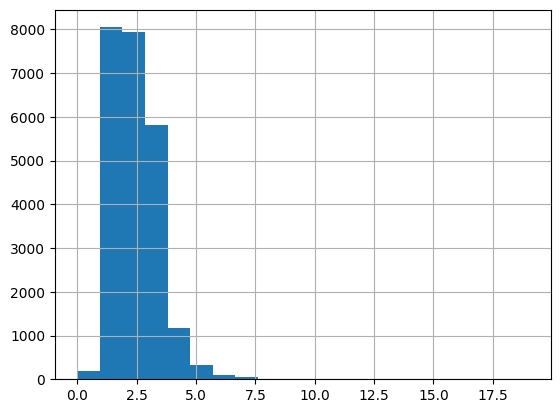

In [19]:
print("Гистограмма по количеству комнат (выборка от 0 до 19 комнат)")
df["rooms"].hist(bins=20, range=(0, 19))

Гистограмма по количеству комнат (выборка от 1 до 6 комнат)


<AxesSubplot:>

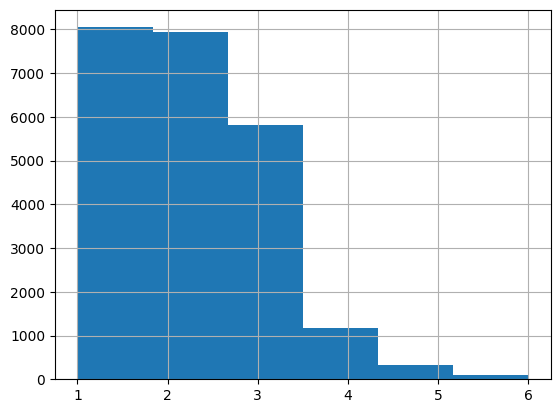

In [20]:
print("Гистограмма по количеству комнат (выборка от 1 до 6 комнат)")
df["rooms"].hist(bins=6, range=(1, 6))

Почти для двух сотен квартир (менее 1 % от числа всех квартир) указано, что количество комнат равно нулю. Тем не менее, поскольку площадь таких квартир варьируется в широком диапазоне от полутора десятков до нескольких сотен кв.м., то заменять значения нулями в количестве комнат чем-то иным не будем (бывают квартиры и 30 кв.м., но двухкомнатные, а бывают и 40 кв.м., но однакомнатные). Цены для квартир с количеством комнат "ноль" также существенно отличаются: от 945 750 р. до 71 000 000 р.

Из таблицы, в которой **данные по количеству комнат** "1" и более, самая недорогая квартира стоит 12 190 р. и имеет общую площадь 109 кв.м. (2 комнаты, потолки 2,75 м) - очевидно, что в указании цены допущена ошибка (возможно, истинная цена 12,19 млн.р.). Второе место по минимальной цене делят две квартиры за 430 тыс. р. с площадями 30,4 и 54,0 кв.м., (1 и 2 комнатная, высота потолков - медианное значение 2,65 м).</br>
Самый дорогой объект (пентхауз на 10-м этаже) продавался за 763 млн.р.: имел площадь 400 кв.м., 7 комнат, высота потолков - медианное значение 2,65 м.</br>

Больше всего продано **одно-, двух- и трехкомнатных квартир**. Причем количество продаж одно- и двухкомнатных объектов практически одинаковое. Четырех-, пяти- и шестикомнатных квартир продается мало. Квартиры, с числом комнат более 6 - уникальные предложения.

#### Оценка по высоте потолков

[В начало](#intro)

In [21]:
print(f"Самые высокие потолки: {(df['ceiling_height'].max())} м., самые низкие - {(df['ceiling_height'].min())} м.")
print()
print("5 первых и 5 последних строк отсортированной по высоте потолков таблицы:")
display(df.sort_values(by='ceiling_height').head())
display(df.sort_values(by='ceiling_height').tail())

Самые высокие потолки: 100.0 м., самые низкие - 1.0 м.

5 первых и 5 последних строк отсортированной по высоте потолков таблицы:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3_km,parks_nearest,ponds_around_3_km,ponds_nearest,days_exposition,price_per_square_meter,week_day,month,year,floor_option,living_ratio,kitchen_ratio
22590,16,6000000.0,55.0,2018-10-31,2,1.00,12.0,32.4,7,False,False,False,10.00,0,Санкт-Петербург,33053.0,14217.0,2,293.0,2,289.0,13,109090.909091,2,10,2018,другой,0.589091,0.181818
5712,5,1500000.0,42.8,2017-08-14,2,1.20,2.0,27.5,1,False,False,False,5.20,0,городской посёлок Мга,NaN,NaN,<NA>,NaN,<NA>,NaN,-8,35046.728972,0,8,2017,первый,0.642523,0.121495
16934,5,4100000.0,40.0,2017-10-17,1,1.75,37.0,17.4,5,False,False,False,8.34,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,71,102500.000000,1,10,2017,другой,0.435000,0.208500
20520,9,3600000.0,38.0,2018-07-05,1,2.00,12.0,15.0,9,False,False,False,11.80,1,Кудрово,NaN,NaN,<NA>,NaN,<NA>,NaN,62,94736.842105,3,7,2018,другой,0.394737,0.310526
552,11,2999000.0,33.5,2017-03-30,1,2.00,15.0,17.5,6,False,False,False,6.50,0,Санкт-Петербург,33972.0,11746.0,1,520.0,1,949.0,14,89522.388060,3,3,2017,другой,0.522388,0.194030


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3_km,parks_nearest,ponds_around_3_km,ponds_nearest,days_exposition,price_per_square_meter,week_day,month,year,floor_option,living_ratio,kitchen_ratio
20478,11,8000000.0,45.0,2017-07-18,1,27.0,4.0,22.0,2,False,False,False,10.0,1,Санкт-Петербург,18975.0,3246.0,0,NaN,3,449.0,-83,177777.777778,1,7,2017,другой,0.488889,0.222222
21377,19,4900000.0,42.0,2017-04-18,1,27.5,24.0,37.7,19,False,False,False,11.0,2,Санкт-Петербург,42742.0,9760.0,0,NaN,0,NaN,61,116666.666667,1,4,2017,другой,0.897619,0.261905
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,False,False,False,8.0,0,Волхов,NaN,NaN,<NA>,NaN,<NA>,NaN,<NA>,38666.666667,0,11,2018,другой,0.706667,0.106667
22336,19,9999000.0,92.4,2019-04-05,2,32.0,6.0,55.5,5,False,False,False,16.5,4,Санкт-Петербург,18838.0,3506.0,0,NaN,3,511.0,<NA>,108214.285714,4,4,2019,другой,0.600649,0.178571
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5.0,14.0,5,True,False,False,11.0,5,Санкт-Петербург,34963.0,8283.0,1,223.0,3,30.0,19,600000.000000,2,7,2018,последний,0.560000,0.440000


Очевидно, что в исходной таблице имеются недостоверные значения по высоте потолков (min = 1 м, max = 100 м.).</br>
Кроме того, у части значений произошло смещение разрядности. Так, например: в строке 3148 (трехкомнатная квартира стоимостью 2,9 млн.р.) указана высота потолков в 32 м, а должно быть 3,2 м.</br>

Исправим разрядность для всех высот, больше 10 м.</br>
Для всех высот менее 2 м заменим значения медианой.</br>

In [22]:
# Исправляем разрядность для всех высот, больше 10 м:
df['ceiling_height'] = (df['ceiling_height'].where(df['ceiling_height'] < 10, df['ceiling_height'] / 10))

# Заменяем медианой значения для всех высот, менее 2 м:
df['ceiling_height'] = (df['ceiling_height'].where(df['ceiling_height'] > 2, df['ceiling_height'].median()))

print(f"Самые высокие потолки: {(df['ceiling_height'].max())} м., самые низкие: {(df['ceiling_height'].min())} м.")
print()
print("5 первых и 5 последних строк отсортированной по высоте потолков таблицы:")
display(df.sort_values(by='ceiling_height').head())
display(df.sort_values(by='ceiling_height').tail())

Самые высокие потолки: 10.0 м., самые низкие: 2.2 м.

5 первых и 5 последних строк отсортированной по высоте потолков таблицы:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3_km,parks_nearest,ponds_around_3_km,ponds_nearest,days_exposition,price_per_square_meter,week_day,month,year,floor_option,living_ratio,kitchen_ratio
12755,2,1400000.0,22.5,2017-09-21,1,2.20,2.0,18.000000,2,False,False,False,4.5,1,село Копорье,NaN,NaN,<NA>,NaN,<NA>,NaN,45,62222.222222,3,9,2017,последний,0.800000,0.200000
17794,1,2300000.0,58.6,2016-05-12,3,2.25,5.0,44.100002,3,False,False,False,5.5,1,деревня Бегуницы,NaN,NaN,<NA>,NaN,<NA>,NaN,45,39249.146758,3,5,2016,другой,0.752560,0.093857
20507,12,5950000.0,60.0,2018-02-19,2,2.26,14.0,35.000000,11,False,False,False,13.0,1,Санкт-Петербург,27028.0,12570.0,0,NaN,0,NaN,40,99166.666667,0,2,2018,другой,0.583333,0.216667
17762,20,2300000.0,54.3,2018-06-28,3,2.30,5.0,39.000000,2,False,False,False,5.3,1,деревня Бегуницы,NaN,NaN,<NA>,NaN,<NA>,NaN,-67,42357.274401,3,6,2018,другой,0.718232,0.097606
5498,17,2200000.0,56.0,2018-04-02,2,2.30,5.0,45.000000,1,False,False,False,9.0,2,Сясьстрой,NaN,NaN,<NA>,NaN,<NA>,NaN,55,39285.714286,0,4,2018,первый,0.803571,0.160714


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3_km,parks_nearest,ponds_around_3_km,ponds_nearest,days_exposition,price_per_square_meter,week_day,month,year,floor_option,living_ratio,kitchen_ratio
17442,0,5350000.0,54.0,2015-06-16,2,8.0,5.0,29.0,2,False,False,False,NaN,1,Красное Село,24638.0,28062.0,0,NaN,0,NaN,-43,99074.074074,1,6,2015,другой,0.537037,NaN
15743,14,5600000.0,67.0,2016-11-11,3,8.0,16.0,41.0,1,False,False,False,8.0,0,Санкт-Петербург,32691.0,11035.0,1,723.0,0,NaN,-38,83582.089552,4,11,2016,первый,0.611940,0.119403
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,False,False,7.3,0,деревня Нурма,NaN,NaN,<NA>,NaN,<NA>,NaN,125,46666.666667,4,3,2018,другой,0.510000,0.243333
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16.0,19.3,14,False,False,False,8.3,1,Санкт-Петербург,13069.0,10763.0,0,NaN,1,613.0,14,125555.555556,2,8,2018,другой,0.428889,0.184444
22869,0,15000000.0,25.0,2018-07-25,1,10.0,5.0,14.0,5,True,False,False,11.0,5,Санкт-Петербург,34963.0,8283.0,1,223.0,3,30.0,19,600000.000000,2,7,2018,последний,0.560000,0.440000


Гистограмма по высоте потолков (выборка от 1 до 100 м)


<AxesSubplot:>

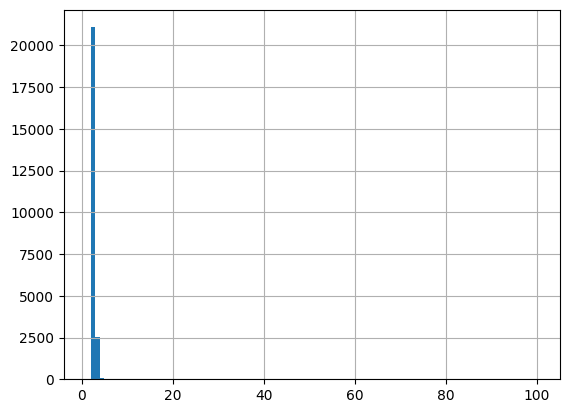

In [23]:
print("Гистограмма по высоте потолков (выборка от 1 до 100 м)")
df["ceiling_height"].hist(bins=100, range=(1, 100))

Гистограмма по высоте потолков (выборка от 2,4 до 4 м)


<AxesSubplot:>

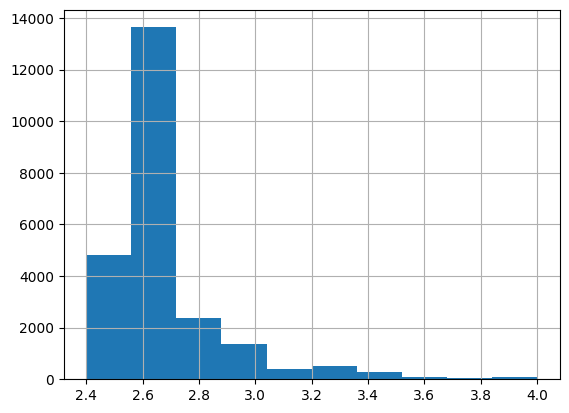

In [24]:
print("Гистограмма по высоте потолков (выборка от 2,4 до 4 м)")
df["ceiling_height"].hist(bins=10, range=(2.4, 4))

После обработки значений **высоты потолков** (для случаев менее 2 м - замена медианой; для случаев более 20 м - корректировкой разрядности с десятков до единиц), отмечаем, что самая невысокая (высота 2,2 м) квартира стоит 1,4 млн.р. и имеет общую площадь 22,2 кв.м. (однокомнатная).</br>
Высота потолков самого высокого объекта в 8,3 м (однокомнатная квартира за 5,65 млн.р. площадью 45 кв.м) - вероятнее всего недостоверна.</br>

Наибольшее количество проданных квартир имеют **потолки высотой** от 2,5 до 3,4 м.

### Анализ времени продажи квартиры

[В начало](#intro)


In [25]:
# Создаем новую таблицу из строк исходного датафрейма, в которых указано количество дней, за которое квартира была продана:
df_not_nan_days_exposition = df.dropna(subset=['days_exposition']).copy()
print(f"Количество квартир, для которых в таблице не указано количество дней, за которое квартира была продана: {(df['days_exposition'].isna().sum())} штук, что составляет {round(((df['days_exposition'].isna().sum()) / (len(df))*100), 2)}% от всех квартир.")
print()
print(f"Самый длительный период размещения объявления - {(df_not_nan_days_exposition['days_exposition'].max())} , самый короткий - {(df_not_nan_days_exposition['days_exposition'].min())} дней.")
print()
print(f"Среднее время размещения объявления - {(df_not_nan_days_exposition['days_exposition'].mean())}, медиана для времени размещения - {df_not_nan_days_exposition['days_exposition'].median()} дней.")
print()
print("5 первых и 5 последних строк таблицы, отсортированной по продолжительности продажи квартиры:")
display(df_not_nan_days_exposition.sort_values(by='days_exposition').head())
display(df_not_nan_days_exposition.sort_values(by='days_exposition').tail())

Количество квартир, для которых в таблице не указано количество дней, за которое квартира была продана: 3181 штук, что составляет 13.42% от всех квартир.

Самый длительный период размещения объявления - 127 , самый короткий - -128 дней.

Среднее время размещения объявления - 19.113802514864997, медиана для времени размещения - 31.0 дней.

5 первых и 5 последних строк таблицы, отсортированной по продолжительности продажи квартиры:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3_km,parks_nearest,ponds_around_3_km,ponds_nearest,days_exposition,price_per_square_meter,week_day,month,year,floor_option,living_ratio,kitchen_ratio
19412,8,4290000.0,51.6,2015-11-07,2,2.65,9.0,31.0,1,False,False,False,8.0,0,Санкт-Петербург,34922.0,12992.0,1,846.0,1,375.0,-128,83139.534884,5,11,2015,первый,0.600775,0.155039
8165,6,3750000.0,57.0,2017-05-28,3,2.65,5.0,43.0,1,False,False,False,6.0,0,Санкт-Петербург,15217.0,8099.0,1,598.0,0,NaN,-128,65789.473684,6,5,2017,первый,0.754386,0.105263
471,10,5700000.0,68.7,2017-03-09,2,2.64,17.0,34.6,12,False,False,False,14.2,1,Санкт-Петербург,32796.0,11871.0,1,388.0,0,NaN,-128,82969.432314,3,3,2017,другой,0.503639,0.206696
5533,9,2500000.0,63.0,2018-05-16,3,2.50,9.0,NaN,2,False,False,False,6.3,2,Кингисепп,NaN,NaN,<NA>,NaN,<NA>,NaN,-128,39682.539683,2,5,2018,другой,NaN,0.100000
8199,10,4930000.0,39.3,2018-03-28,1,2.75,23.0,14.3,22,False,False,False,9.7,0,Санкт-Петербург,51333.0,13056.0,0,NaN,0,NaN,-128,125445.292621,2,3,2018,другой,0.363868,0.246819


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3_km,parks_nearest,ponds_around_3_km,ponds_nearest,days_exposition,price_per_square_meter,week_day,month,year,floor_option,living_ratio,kitchen_ratio
5492,20,3950000.0,46.8,2017-07-20,2,2.50,9.0,27.70,5,False,False,False,6.8,0,Санкт-Петербург,44180.0,14253.0,1,963.0,0,NaN,127,84401.709402,3,7,2017,другой,0.591880,0.145299
11146,18,8000000.0,59.0,2018-11-20,1,2.74,21.0,20.00,18,False,False,False,17.4,2,Санкт-Петербург,27543.0,9432.0,0,NaN,2,376.0,127,135593.220339,1,11,2018,другой,0.338983,0.294915
5347,10,7700000.0,82.0,2016-03-30,3,2.65,11.0,46.60,10,False,False,False,12.7,0,Санкт-Петербург,22802.0,17372.0,0,NaN,1,876.0,127,93902.439024,2,3,2016,другой,0.568293,0.154878
5947,5,17051000.0,100.3,2018-02-13,3,3.00,17.0,53.33,14,False,False,False,23.3,0,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,127,170000.000000,1,2,2018,другой,0.531705,0.232303
19473,8,16200000.0,106.0,2017-07-10,3,2.50,5.0,83.00,2,False,False,False,15.0,0,Санкт-Петербург,23782.0,4350.0,2,432.0,0,NaN,127,152830.188679,0,7,2017,другой,0.783019,0.141509


Гистограмма по времени продажи квартир (выборка от 1 до 1580 дней)


<AxesSubplot:>

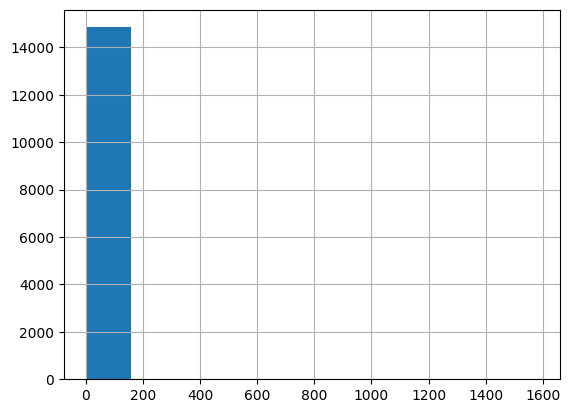

In [26]:
print("Гистограмма по времени продажи квартир (выборка от 1 до 1580 дней)")
df["days_exposition"].hist(bins=10, range=(1, 1580))

Гистограмма по времени продажи квартир (выборка от 1 до 630 дней)


<AxesSubplot:>

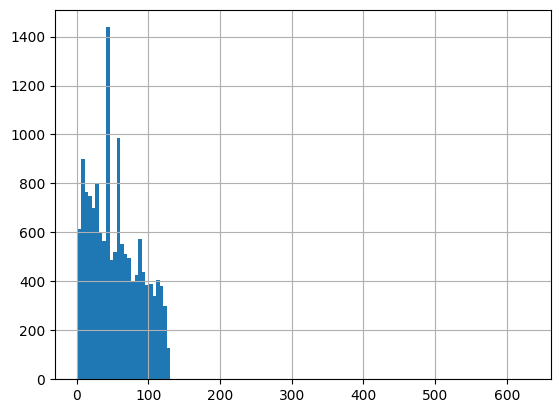

In [27]:
print("Гистограмма по времени продажи квартир (выборка от 1 до 630 дней)")
df["days_exposition"].hist(bins=126, range=(1, 630))

Количество квартир, для которых в таблице **не указано количество дней**, за которое квартира была продана: 3181 штук, что составляет 13,42% от всех квартир.

Для квартир, у которых период размещения объявления указан, самый длительный **период размещения объявления** в 1580 дней зарегистрирован для двухкомнатной квартиры в д. Новое Девяткино площадью 48,2 кв.м. стоимостью 3,5 млн.р. с 3 балконами и высотой потолков 2,5 м. Квартира-рекордсмен по быстроте продажи (продана за 1 день): двухкомнатная в Санкт-Петербурге площадью 49,9 кв.м. стоимостью 4,0 млн.р. без балкона с высотой потолков 2,5 м.

**Среднее время размещения объявления** - 180,9 дней, **медиана для времени размещения** - 95,0 дней. То обстоятельство, что медиана почти в 2 раза меньше среднего свидетельствует о значительном искажении статистики за счет выбросов с очень большой продолжительностью продажи.

**Обычно продажа занимает** до полугода (150-180 дней).

Если объявление снято в первые 1,5-2 месяца (50-60 дней), то можно считать, что **продажи прошли очень быстро**, а когда объявление висит больше года - это означает, что **объект продавался необычно долго** (для определенности считаем продажи длительностью 13 и более месяцев - долгими).


### Обработка редких значений и выбросов

[В начало](#intro)


Исходный датафрейм содержит объекты, информация по которым значительно может исказить усредненные результаты.</br>
Для дальнейшего исследования **создадим новый датафрейм**, в который попадут только те значения из исходного, которые считаем наиболее характерными - включим в новый датафрейм все строки, для которых одновременно выполняются следующие условия:</br>
- общая площадь находится в пределах от 20 до 150 кв.м.;</br>
- цена продажи: от 0,43 до 17,50 млн.р.;</br>
- количество комнат: от 1 до 6;</br>
- высота потолков: от 2,5 до 3,4 м;</br>
- время продажи: от 1 до 395 дней.


In [28]:
# Создаем новый датафрейм по заданным условиям:
# total_area:
a_min = 20
a_max = 150
# last_price:
p_min = 430000
p_max = 17500000
# rooms:
r_min = 1
r_max = 6
# ceiling_height:
h_min = 2.5
h_max = 3.4
# days_exposition:
d_min = 1
d_max = 395
df_good = df.query('(@a_min <= total_area <= @a_max) and (@p_min <= last_price <= @p_max) and (@r_min <= rooms <= @r_max) and (@h_min <= ceiling_height <= @h_max) and (@d_min <= days_exposition <= @d_max)')
#df_good = df.query('(a_min <= total_area <= a_max) and (p_min <= last_price <= p_max) and (r_min <= rooms <= r_max) and (h_min <= ceiling_height <= h_max) and (d_min <= days_exposition <= d_max)')

print(f'Новый датафрейм содержит {len(df_good)} квартир, то есть {round(((len(df_good) / len(df))*100), 2)}% от всех квартир исходного датафрейма.')
print()
print('Первые 5 строк нового датафрейма:')
display(df_good.head())

Новый датафрейм содержит 14003 квартир, то есть 59.09% от всех квартир исходного датафрейма.

Первые 5 строк нового датафрейма:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3_km,parks_nearest,ponds_around_3_km,ponds_nearest,days_exposition,price_per_square_meter,week_day,month,year,floor_option,living_ratio,kitchen_ratio
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,46,92785.714286,3,8,2015,другой,0.612500,0.148214
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000,1,6,2018,другой,0.320000,0.410000
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,False,False,9.1,0,городской посёлок Янино-1,NaN,NaN,<NA>,NaN,<NA>,NaN,55,95065.789474,0,9,2018,другой,0.473684,0.299342
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,33,88524.590164,6,2,2017,другой,0.714754,0.106557


После исключения редких значений и выбросов мы получили новую таблицу из данных для 16855 квартир исходной таблицы. В нашей выборке **осталось 71.12% от всех квартир исходного датафрейма**, но качество этих данных лучше.

 ### Оценка факторов, имеющих наибольшее влияние на стоимость квартиры 

[В начало](#intro)

Изучим, зависит ли цена от:</br>
- площади,</br> 
- числа комнат,</br>
- удалённости от центра,</br> 
- этажа (первый, последний, другой),</br>
- даты размещения (дня недели, месяца и года).

Матрица корреляции цены, площади, числа комнат, удалённости от центра:
                      last_price  total_area     rooms  city_сenters_nearest
last_price              1.000000    0.747806  0.471441             -0.349354
total_area              0.747806    1.000000  0.797674             -0.166256
rooms                   0.471441    0.797674  1.000000             -0.107334
city_сenters_nearest   -0.349354   -0.166256 -0.107334              1.000000

Проверка зависимости цены и площади.
 Коэффициент корреляции: 0.7478063061635948
 Диаграмма рассеяния:


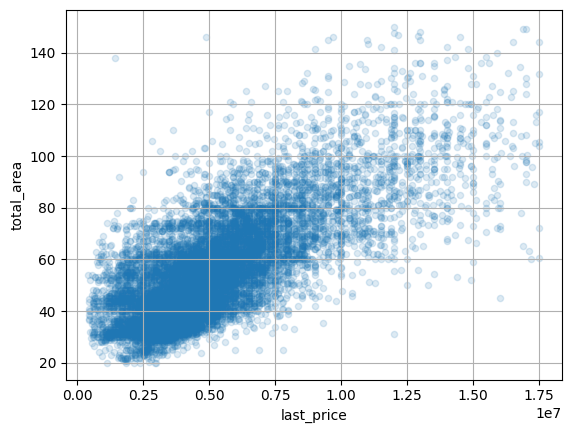


Проверка зависимости цены и числа комнат.
 Коэффициент корреляции: 0.4714406586078988
 Диаграмма размаха:


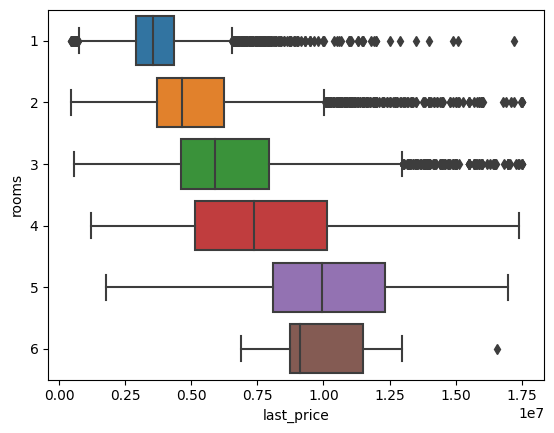


Проверка зависимости цены и удаленности от центра.
 Коэффициент корреляции: -0.34935354461146756
 Диаграмма рассеяния:


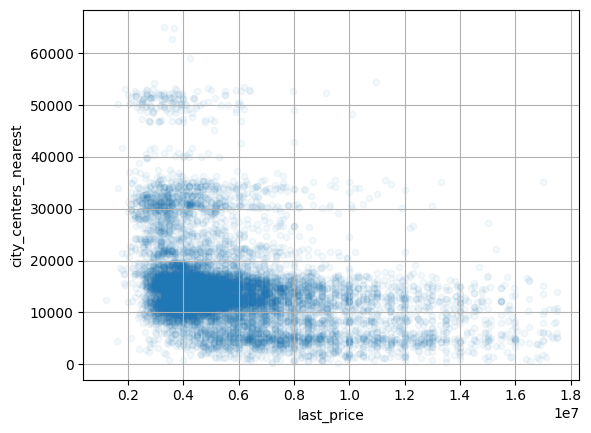

In [29]:
print("Матрица корреляции цены, площади, числа комнат, удалённости от центра:")
df_good_one = df_good.loc[:, ['last_price', 'total_area', 'rooms', 'city_сenters_nearest']]
print(df_good_one.corr())
print()
print('Проверка зависимости цены и площади.\n Коэффициент корреляции:', df_good['last_price'].corr(df_good['total_area']))
print(' Диаграмма рассеяния:')
df_good.plot(x='last_price', y='total_area', kind='scatter', alpha=0.15, grid=True)
plt.show()
print()
print('Проверка зависимости цены и числа комнат.\n Коэффициент корреляции:', df_good['last_price'].corr(df_good['rooms']))
print(' Диаграмма размаха:')
sns.boxplot(x='last_price', y='rooms', data=df_good, orient="h")
plt.show()
print()
print('Проверка зависимости цены и удаленности от центра.\n Коэффициент корреляции:', df_good['last_price'].corr(df_good['city_сenters_nearest']))
print(' Диаграмма рассеяния:')
df_good.plot(x='last_price', y='city_сenters_nearest', kind='scatter', alpha=0.05, grid=True)
plt.show()

Проверка зависимости цены и этажа (1 - первый, 2 - другой, 3 - последний).
 Коэффициент корреляции: 0.0436790742583837
 Диаграмма размаха:


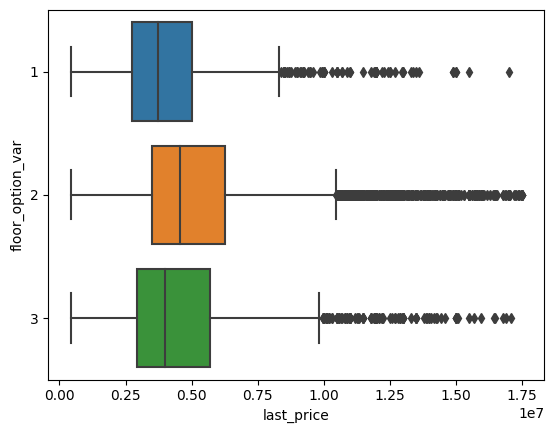

In [30]:
# Создадим функцию, которая категоризирование данные floor_option "первый / другой / последний" переводит в значение "1 / 2 / 3":   
def f_floor_option_var(row):
    x = row['floor_option']
    if x == "первый": return 1
    elif x == "другой" : return 2
    else: return 3
 
# Создадим столбец floor_option_var с категориями "1 / 2 / 3":
df_good['floor_option_var'] = df_good.apply(f_floor_option_var, axis=1)

print('Проверка зависимости цены и этажа (1 - первый, 2 - другой, 3 - последний).\n Коэффициент корреляции:', df_good['last_price'].corr(df_good['floor_option_var']))
print(' Диаграмма размаха:')
sns.boxplot(x='last_price', y='floor_option_var', data=df_good, orient="h")
plt.show()

Матрица корреляции цены, дня недели, месяца и года размещения объявления:
            last_price  week_day     month      year
last_price    1.000000 -0.012231  0.010317 -0.042287
week_day     -0.012231  1.000000  0.022406 -0.000476
month         0.010317  0.022406  1.000000 -0.248977
year         -0.042287 -0.000476 -0.248977  1.000000

Проверка зависимости цены и дня недели размещения объявления.
 Коэффициент корреляции: -0.012231259547019827
 Диаграмма размаха:


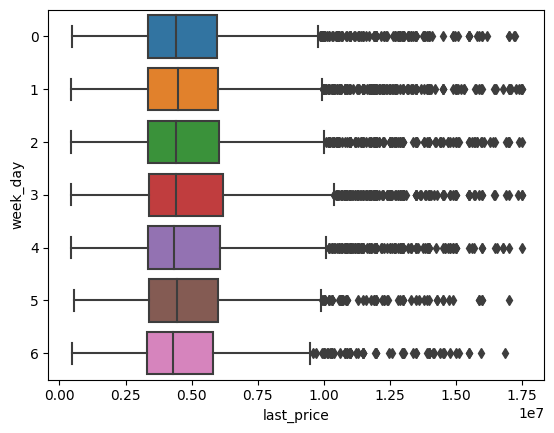


Проверка зависимости цены и месяца размещения объявления.
 Коэффициент корреляции: 0.010316554637656045
 Диаграмма размаха:


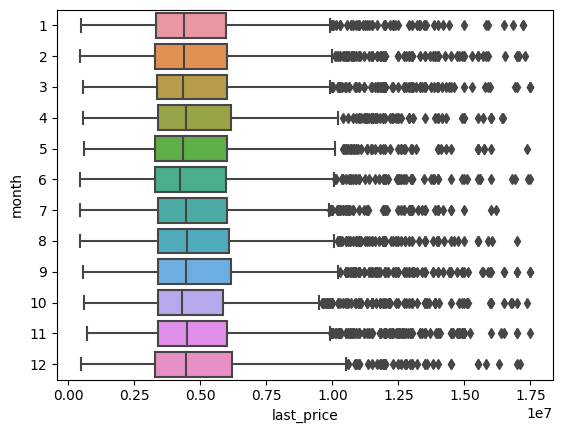


Проверка зависимости цены и года размещения объявления.
 Коэффициент корреляции: -0.04228680350701062
 Диаграмма размаха:


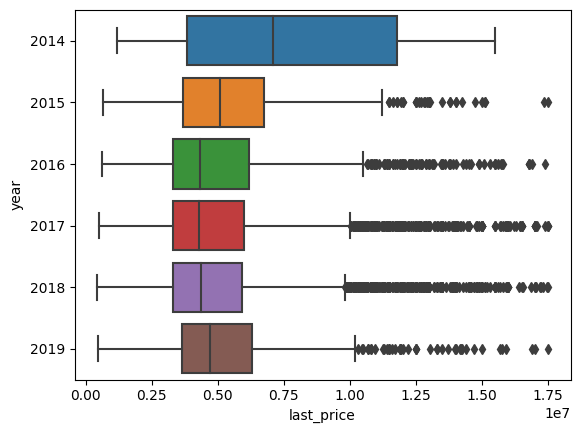

In [31]:
print("Матрица корреляции цены, дня недели, месяца и года размещения объявления:")
df_good_three = df_good.loc[:, ['last_price', 'week_day', 'month', 'year']]
print(df_good_three.corr())
print()
print('Проверка зависимости цены и дня недели размещения объявления.\n Коэффициент корреляции:', df_good['last_price'].corr(df_good['week_day']))
print(' Диаграмма размаха:')
sns.boxplot(x='last_price', y='week_day', data=df_good, orient="h")
plt.show()
print()
print('Проверка зависимости цены и месяца размещения объявления.\n Коэффициент корреляции:', df_good['last_price'].corr(df_good['month']))
print(' Диаграмма размаха:')
sns.boxplot(x='last_price', y='month', data=df_good, orient="h")
plt.show()
print()
print('Проверка зависимости цены и года размещения объявления.\n Коэффициент корреляции:', df_good['last_price'].corr(df_good['year']))
print(' Диаграмма размаха:')
sns.boxplot(x='last_price', y='year', data=df_good, orient="h")
plt.show()

В ходе анализа установлено, что:</br>
- **цена имеет прямую зависимость от площади квартиры** (коэф. корреляции 0,75): чем больше площадь, тем, как правило, выше цена. Как правило, **цена увеличивается с увеличением количества комнат** (наблюдаем из диаграммы размаха по значениям медиан, хотя коэф. корреляции для этого параметра всего 0,47). **Цена имеет слабую отрицательную зависимость от удаленности от центра** (коэф. корреляции -0,35);</br>
- как правило, **квартиры на первом и последнем этажах стоят дешевле**, чем "в середине дома" - видно по диаграмме размаха, хотя по коэффициенту корреляции этого не скажешь (равен 0,05);</br>
- исходя из абсолютных значений коэффициентов корреляции (менее двух сотых), нет существенной зависимости между ценой и датой размещения объявления. Однако из диаграмм размаха можно заключить, что квартиры, объявления о продаже которых были поданы **в субботу**, - стоят чуть дороже остальных; объявления, поданные **в июне** - несколько дешевле остальных; квартиры, объявления по которым публиковались **в 2016...2018 годах** - также стоили дешевле остальных.

### Анализ для 10 населённых пунктов с наибольшим числом объявлений

[В начало](#intro)

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах и выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [32]:
# Собираем сводную таблицу по населенным пунктам, отсортированную по убыванию числа объявлений:
# а) готовим сводные таблицы по населенным пунктам:
df_good_locality_count = df_good.pivot_table(index='locality_name', values='last_price', aggfunc='count')
df_good_locality_price_per_square_meter_mean = df_good.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc='mean'                  )
df_good_locality_price_max = df_good.pivot_table(index='locality_name', values='last_price', aggfunc='max')
df_good_locality_price_min = df_good.pivot_table(index='locality_name', values='last_price', aggfunc='min')
# б) последовательно объединяем сводные таблицы по населенным пунктам:
df_good_locality = df_good_locality_count.join(df_good_locality_price_per_square_meter_mean, on='locality_name')
df_good_locality = df_good_locality.join(df_good_locality_price_max, rsuffix='_max', on='locality_name') 
df_good_locality = df_good_locality.join(df_good_locality_price_min, rsuffix='_min', on='locality_name')
# в) переименовываем столбцы в объединенной сводной таблице:
df_good_locality.columns = ['count', 'price_per_square_meter_mean', 'price_max', 'price_min']
# г) сортируем столбцы в объединенной сводной таблице по убыванию количества объявлений:
df_good_locality = df_good_locality.sort_values(by='count', ascending=False)
# д) из полученной таблицы формируем таблицу ТОП-10 нас.пунктов с наибольшим числом объявлений:
df_good_locality_top_10 = df_good_locality.head(10)

print('10 населённых пунктов с наибольшим числом объявлений:')
#print(df_good_locality_top_10.index)
display(df_good_locality_top_10)
print('\n при этом')
print('\n - данные по населённому пункту с самой высокой средней ценой кв.м. жилья:')
price_per_square_meter_mean_max_10 = df_good_locality_top_10['price_per_square_meter_mean'].max()
display(df_good_locality_top_10.query('price_per_square_meter_mean == @price_per_square_meter_mean_max_10'))
print('\n - данные по населённому пункту с самой низкой средней ценой кв.м. жилья:')
price_per_square_meter_mean_min_10 = df_good_locality_top_10['price_per_square_meter_mean'].min()
display(df_good_locality_top_10.query('price_per_square_meter_mean == @price_per_square_meter_mean_min_10'))
print('\n - данные по населённому пункту с самой высокой стоимостью жилья:')
price_max_10 = df_good_locality_top_10['price_max'].max()
display(df_good_locality_top_10.query('price_max == @price_max_10'))
print('\n - данные по населённому пункту с самой низкой стоимостью жилья:')
price_min_10 = df_good_locality_top_10['price_min'].min()
display(df_good_locality_top_10.query('price_min == @price_min_10'))

10 населённых пунктов с наибольшим числом объявлений:


,count,price_per_square_meter_mean,price_max,price_min
locality_name,,,,
Санкт-Петербург,9163,106320.952397,17500000.0,1200000.0
посёлок Мурино,375,85520.115555,8500000.0,1846230.0
посёлок Шушары,287,78632.707412,10700000.0,1780000.0
Колпино,233,74622.897745,8600000.0,2100000.0
Всеволожск,227,67045.463774,10890000.0,965780.0
деревня Кудрово,222,92769.530247,10500000.0,2100000.0
посёлок Парголово,218,90129.669669,9140000.0,1800000.0
Пушкин,193,100527.475979,15000000.0,2550000.0
Гатчина,187,68828.218148,9500000.0,1050000.0



 при этом

 - данные по населённому пункту с самой высокой средней ценой кв.м. жилья:


,count,price_per_square_meter_mean,price_max,price_min
locality_name,,,,
Санкт-Петербург,9163,106320.952397,17500000.0,1200000.0



 - данные по населённому пункту с самой низкой средней ценой кв.м. жилья:


,count,price_per_square_meter_mean,price_max,price_min
locality_name,,,,
Выборг,138,57488.721433,7200000.0,950000.0



 - данные по населённому пункту с самой высокой стоимостью жилья:


,count,price_per_square_meter_mean,price_max,price_min
locality_name,,,,
Санкт-Петербург,9163,106320.952397,17500000.0,1200000.0



 - данные по населённому пункту с самой низкой стоимостью жилья:


,count,price_per_square_meter_mean,price_max,price_min
locality_name,,,,
Выборг,138,57488.721433,7200000.0,950000.0


Найдены **10 населенных пунктов с самым большим количеством объявлений о продаже квартир**: 'Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'Колпино', 'посёлок Парголово', 'Пушкин', 'деревня Кудрово', 'Гатчина', 'Выборг'.</br>
Самая высокая **средняя цена за квадратный метр** в Санкт-Петербурге (106,2 тыс.р./кв.м), самая низкая - в Выборге (56,9 тыс.р./кв.м).</br>
**Самыя дорогая** квартира в Санкт-Петербурге (17,50 млн.р. - верхняя граница примененного фильтра), **самая дешевая** - в Выборге (0,6 млн.р.).</br>

### Поиск квартир в центре Санкт-Петербурга

[В начало](#intro)

Выясним, какая область входит в центр Санкт-Петербурга на основе графика зависимости цены от удаленности от центра города.</br>
Для анализа используем таблицу, очищенную от редких значений и выбросов (см. п. 4.3 исследования). 

Таблица с выборкой по Санкт-Петербургу содержит 9163 строк.
Количество строк, для которых в таблице расстояние до центра не указано: 16
- исключаем эти строки из дальнейшего рассмотрения.

График зависимости средней цены от удаленности от центра города:


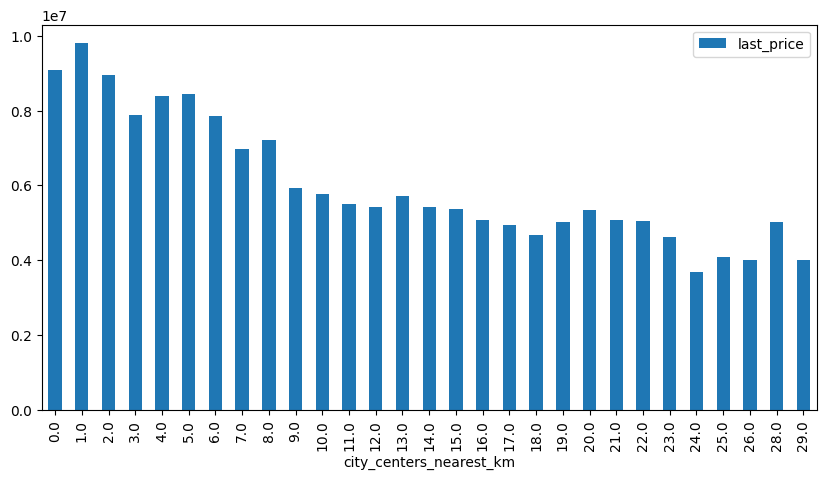

График зависимости медианной цены от удаленности от центра города:


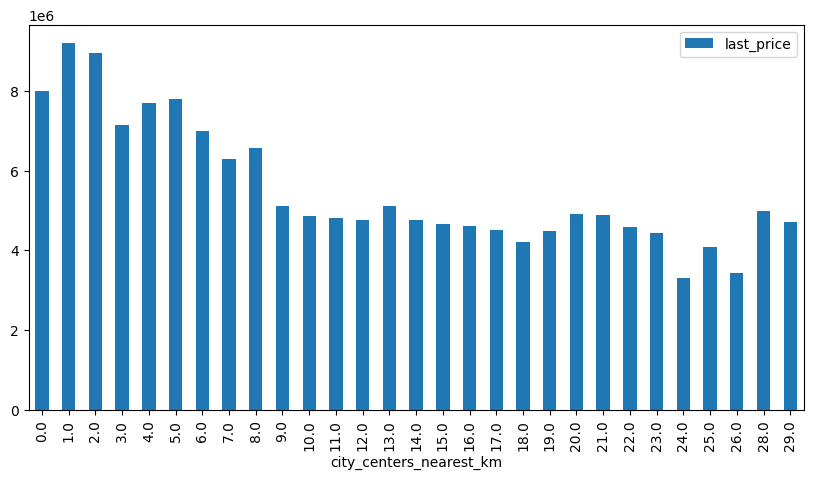

In [33]:
# Собираем таблицу по Санкт-Петербургу:
df_good_spb = df_good.query("locality_name == 'Санкт-Петербург'")
# Добавляем в таблицу столбец с расстоянием до центра в километрах с округлением до целых значений:
df_good_spb['city_сenters_nearest_km'] = round((df_good_spb['city_сenters_nearest'] / 1000), 0)

print('Таблица с выборкой по Санкт-Петербургу содержит', df_good_spb.shape[0],'строк.')
print('Количество строк, для которых в таблице расстояние до центра не указано:', df_good_spb['city_сenters_nearest_km'].isna().sum())
print('- исключаем эти строки из дальнейшего рассмотрения.\n')
df_good_spb = df_good_spb.dropna(subset=['city_сenters_nearest_km'])

# Рассчитываем среднюю цену для каждого километра применяя сводную таблицу:
df_good_spb_mean_price_km = df_good_spb.pivot_table(index='city_сenters_nearest_km', values='last_price', aggfunc='mean')
# Сортируем получившуюся таблицу по возрастанию удаленности от центра:
df_good_spb_mean_price_km = df_good_spb_mean_price_km.sort_values(by='city_сenters_nearest_km')
print('График зависимости средней цены от удаленности от центра города:')
df_good_spb_mean_price_km.plot(kind='bar', y='last_price', figsize=(10, 5))
plt.show()

# Рассчитываем медианную цену для каждого километра применяя сводную таблицу:
df_good_spb_median_price_km = df_good_spb.pivot_table(index='city_сenters_nearest_km', values='last_price', aggfunc='median')
# Сортируем получившуюся таблицу по возрастанию удаленности от центра:
df_good_spb_median_price_km = df_good_spb_median_price_km.sort_values(by='city_сenters_nearest_km')
print('График зависимости медианной цены от удаленности от центра города:')
df_good_spb_median_price_km.plot(kind='bar', y='last_price', figsize=(10, 5))
plt.show()

На основе убывания средней цены в зависимости от удаленности от центра, определено, что **центральная часть города** заканчивается на 8 километре.</br>
При этом на 27 километре также расположены дорогостоящие квартиры.</br>

### Анализ квартир в центре Санкт-Петербурга и сопоставление с выводами по всей базе

[В начало](#intro)

На основе данных предыдущего пункта исследования выделяем сегмент квартир в центре. Проанализируем эту территорию по следующим параметрам: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (площадь, число комнат, этаж, удалённость от центра, дата размещения объявления). Проверим, отличаются ли полученные выводы от выводов по всей базе.

In [34]:
# Собираем таблицу по центру Санкт-Петербурга:
df_good_spb_centre = df_good_spb.query("city_сenters_nearest_km <= 8")


#### Центр СПб: оценка по общей площади

[В начало](#intro)

In [35]:
print("5 первых и 5 последних строк таблицы, отфильтрованной по возрастанию площади:")
display(df_good_spb_centre.sort_values(by='total_area').head())
display(df_good_spb_centre.sort_values(by='total_area').tail())

5 первых и 5 последних строк таблицы, отфильтрованной по возрастанию площади:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3_km,parks_nearest,ponds_around_3_km,ponds_nearest,days_exposition,price_per_square_meter,week_day,month,year,floor_option,living_ratio,kitchen_ratio,floor_option_var,city_сenters_nearest_km
4077,10,3000000.0,20.0,2017-04-10,2,2.65,6.0,13.0,2,False,False,False,5.6,0,Санкт-Петербург,28450.0,6996.0,2,223.0,1,611.0,16,150000.000000,0,4,2017,другой,0.650000,0.280000,2,7.0
17860,1,2385000.0,20.0,2018-12-11,1,2.65,6.0,NaN,2,False,False,False,NaN,0,Санкт-Петербург,23361.0,2903.0,0,NaN,1,1002.0,25,119250.000000,1,12,2018,другой,NaN,NaN,2,3.0
8873,6,2950000.0,20.0,2016-06-18,1,2.65,7.0,14.0,1,False,False,False,6.0,0,Санкт-Петербург,24053.0,4621.0,1,247.0,0,NaN,38,147500.000000,5,6,2016,первый,0.700000,0.300000,1,5.0
6544,4,2740000.0,20.3,2018-12-18,1,3.00,6.0,16.0,1,False,False,False,4.0,0,Санкт-Петербург,26191.0,4893.0,0,NaN,1,1018.0,29,134975.369458,1,12,2018,первый,0.788177,0.197044,1,5.0
7047,9,2800000.0,21.0,2017-09-23,1,2.65,5.0,14.9,3,False,False,False,3.8,0,Санкт-Петербург,19676.0,3974.0,0,NaN,3,518.0,108,133333.333333,5,9,2017,другой,0.709524,0.180952,2,4.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3_km,parks_nearest,ponds_around_3_km,ponds_nearest,days_exposition,price_per_square_meter,week_day,month,year,floor_option,living_ratio,kitchen_ratio,floor_option_var,city_сenters_nearest_km
10880,5,11990000.0,147.7,2017-06-23,5,2.65,NaN,NaN,3,False,False,False,NaN,0,Санкт-Петербург,20160.0,3252.0,2,320.0,1,976.0,88,81178.063643,4,6,2017,другой,NaN,NaN,2,3.0
3607,10,13000000.0,148.0,2018-01-20,4,2.65,5.0,NaN,4,False,False,False,NaN,0,Санкт-Петербург,23313.0,2333.0,2,359.0,1,87.0,90,87837.837838,5,1,2018,другой,NaN,NaN,2,2.0
13464,4,16900000.0,149.0,2016-06-02,5,2.65,6.0,82.0,5,False,False,False,18.0,0,Санкт-Петербург,24234.0,3801.0,0,NaN,0,NaN,77,113422.818792,3,6,2016,другой,0.550336,0.120805,2,4.0
890,3,17000000.0,149.2,2017-12-19,5,3.00,6.0,104.2,1,False,False,False,17.8,0,Санкт-Петербург,20123.0,1852.0,3,510.0,3,417.0,98,113941.018767,1,12,2017,первый,0.698391,0.119303,1,2.0
6587,9,11990000.0,150.0,2016-11-30,4,3.08,7.0,94.4,6,False,False,False,12.4,1,Санкт-Петербург,20714.0,3830.0,3,419.0,1,517.0,34,79933.333333,2,11,2016,другой,0.629333,0.082667,2,4.0


Гистограмма по общей площади (выборка от 20 до 150 кв.м.)


<AxesSubplot:>

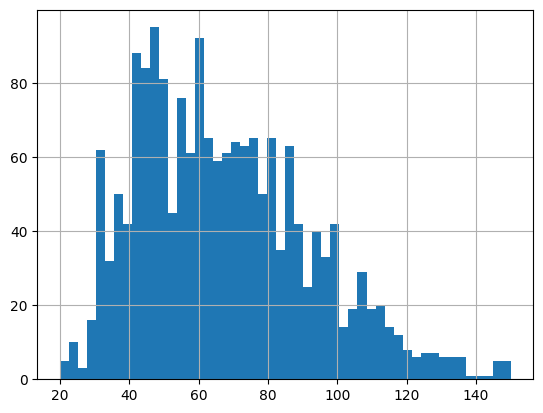

In [36]:
print("Гистограмма по общей площади (выборка от 20 до 150 кв.м.)")
df_good_spb_centre["total_area"].hist(bins=50, range=(20, 150))

Статус **самой маленькой квартиры** (площадь 20 кв.м. - нижняя граница примененного фильтра) делят сразу три объекта: две однокомнатные стоимостью 2,385 и 2,950 млн.р. и одна двухкомнатная стоимостью 3,000 млн.р. Высота потолков во всех трех случаях 2,65 м (медианное значение).</br>
Статус **самой просторной квартиры** (площадь 150 кв.м. - верхняя граница примененного фильтра) делят две пятикомнатные квартиры стоимостью 10,20 и 12,7 млн.р. , с высотой потолков 3,4 и 3,35 м соответственно.</br>
**Наибольшее количество квартир имеет площадь** от 30 до 120 кв.м.

#### Центр СПб: оценка по цене

[В начало](#intro)

In [37]:
print("5 первых и 5 последних строк таблицы, отфильтрованной по цене:")
display(df_good_spb_centre.sort_values(by='last_price').head())
display(df_good_spb_centre.sort_values(by='last_price').tail())

5 первых и 5 последних строк таблицы, отфильтрованной по цене:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3_km,parks_nearest,ponds_around_3_km,ponds_nearest,days_exposition,price_per_square_meter,week_day,month,year,floor_option,living_ratio,kitchen_ratio,floor_option_var,city_сenters_nearest_km
23394,10,1600000.0,92.0,2018-07-10,3,3.00,6.0,13.0,1,False,False,False,10.0,0,Санкт-Петербург,20881.0,4465.0,1,937.0,3,167.0,3,17391.304348,1,7,2018,первый,0.141304,0.108696,1,4.0
13739,19,2100000.0,80.0,2016-07-01,4,2.65,6.0,23.0,3,False,False,False,14.0,0,Санкт-Петербург,23953.0,5094.0,1,595.0,1,705.0,23,26250.000000,4,7,2016,другой,0.287500,0.175000,2,5.0
17860,1,2385000.0,20.0,2018-12-11,1,2.65,6.0,NaN,2,False,False,False,NaN,0,Санкт-Петербург,23361.0,2903.0,0,NaN,1,1002.0,25,119250.000000,1,12,2018,другой,NaN,NaN,2,3.0
21718,11,2540000.0,23.0,2018-03-22,1,2.65,5.0,NaN,1,False,False,False,NaN,0,Санкт-Петербург,27289.0,7997.0,0,NaN,1,698.0,45,110434.782609,3,3,2018,первый,NaN,NaN,1,8.0
20164,8,2600000.0,24.0,2018-03-15,1,2.50,10.0,13.0,3,False,False,False,NaN,2,Санкт-Петербург,30067.0,6262.0,0,NaN,1,332.0,26,108333.333333,3,3,2018,другой,0.541667,NaN,2,6.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3_km,parks_nearest,ponds_around_3_km,ponds_nearest,days_exposition,price_per_square_meter,week_day,month,year,floor_option,living_ratio,kitchen_ratio,floor_option_var,city_сenters_nearest_km
734,20,17390000.0,113.0,2017-06-06,4,2.65,18.0,67.0,10,False,False,False,19.0,1,Санкт-Петербург,17313.0,7963.0,0,NaN,0,NaN,94,153893.805310,1,6,2017,другой,0.592920,0.168142,2,8.0
5861,16,17480000.0,105.6,2018-09-04,2,2.70,13.0,39.7,12,False,False,False,44.9,2,Санкт-Петербург,30782.0,8154.0,0,NaN,2,424.0,115,165530.303030,1,9,2018,другой,0.375947,0.425189,2,8.0
19228,11,17500000.0,117.0,2017-06-22,3,3.20,6.0,95.0,2,False,False,False,10.0,0,Санкт-Петербург,26786.0,4993.0,1,624.0,1,712.0,103,149572.649573,3,6,2017,другой,0.811966,0.085470,2,5.0
3730,16,17500000.0,60.6,2017-11-09,2,2.95,8.0,33.1,3,False,False,False,12.4,0,Санкт-Петербург,24651.0,5331.0,2,529.0,0,NaN,12,288778.877888,3,11,2017,другой,0.546205,0.204620,2,5.0
1343,20,17500000.0,131.8,2019-03-13,3,2.60,12.0,81.6,7,False,False,False,17.7,0,Санкт-Петербург,29503.0,6040.0,1,137.0,1,802.0,30,132776.934750,2,3,2019,другой,0.619120,0.134294,2,6.0


Гистограмма по цене (выборка от 430 т.р. до 15 млн.р.)


<AxesSubplot:>

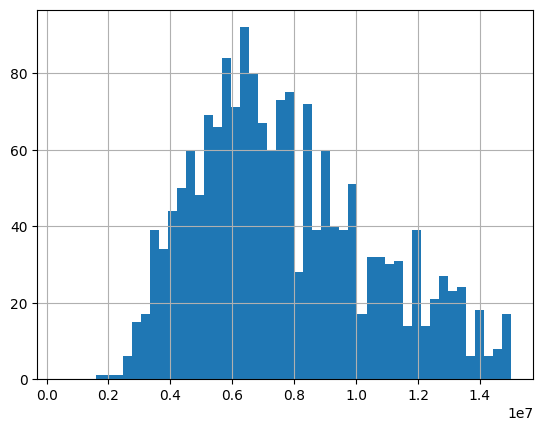

In [38]:
print("Гистограмма по цене (выборка от 430 т.р. до 15 млн.р.)")
df_good_spb_centre["last_price"].hist(bins=50, range=(430000, 15000000))

**Самая недорогая квартира** стоит 1,6 млн.р. и имеет общую площадь 92 кв.м. (3 комнаты, потолки 3 м).</br>
**Самые дорогие объекты** продавались за 17,5 млн.р. (три объекта: две трехкомнатных и одна двухкомнантая квартиры).</br>
**Цена наибольшего количества квартир** находится в диапазоне от 3,0 до 13 млн.р.

#### Центр СПб: оценка по количеству комнат

[В начало](#intro)

In [39]:
# Собираем сводную таблицу по отфильтрованному датафрейму (п.4.3) на основе количества комнат по параметрам количества объявлений и стоимости:

# а) готовим сводные таблицы по парамтрам:
df_good_rooms_count = df_good.pivot_table(index='rooms', values='first_day_exposition', aggfunc='count')
df_good_rooms_price_per_square_meter_mean = df_good.pivot_table(index='rooms', values='price_per_square_meter', aggfunc='mean'                  )
df_good_rooms_price_max = df_good.pivot_table(index='rooms', values='last_price', aggfunc='max')
df_good_rooms_price_min = df_good.pivot_table(index='rooms', values='last_price', aggfunc='min')

# б) последовательно объединяем сводные таблицы по количеству комнат:
df_good_rooms = df_good_rooms_count.join(df_good_rooms_price_per_square_meter_mean, on='rooms')
df_good_rooms = df_good_rooms.join(df_good_rooms_price_max, rsuffix='_max', on='rooms') 
df_good_rooms = df_good_rooms.join(df_good_rooms_price_min, rsuffix='_min', on='rooms')

# в) переименовываем столбцы в объединенной сводной таблице:
#display(df_good_rooms)
df_good_rooms = df_good_rooms.rename(
    columns={
        'first_day_exposition': 'first_day_exposition_df_good',
        'price_per_square_meter': 'price_per_square_meter_df_good',
        'last_price': 'last_price_max_df_good',
        'last_price_min': 'last_price_min_df_good',
        }
)
#display(df_good_rooms)


# Собираем сводную таблицу по центру Санкт-Петербурга на основе количества комнат по параметрам количества объявлений и стоимости:

# а) готовим сводные таблицы по парамтрам:
df_good_spb_centre_rooms_count = df_good_spb_centre.pivot_table(index='rooms', values='first_day_exposition', aggfunc='count')
df_good_spb_centre_rooms_price_per_square_meter_mean = df_good_spb_centre.pivot_table(index='rooms', values='price_per_square_meter', aggfunc='mean'                  )
df_good_spb_centre_rooms_price_max = df_good_spb_centre.pivot_table(index='rooms', values='last_price', aggfunc='max')
df_good_spb_centre_rooms_price_min = df_good_spb_centre.pivot_table(index='rooms', values='last_price', aggfunc='min')

# б) последовательно объединяем сводные таблицы по количеству комнат:
df_good_spb_centre_rooms = df_good_spb_centre_rooms_count.join(df_good_spb_centre_rooms_price_per_square_meter_mean, on='rooms')
df_good_spb_centre_rooms = df_good_spb_centre_rooms.join(df_good_spb_centre_rooms_price_max, rsuffix='_max', on='rooms') 
df_good_spb_centre_rooms = df_good_spb_centre_rooms.join(df_good_spb_centre_rooms_price_min, rsuffix='_min', on='rooms')

# в) добавляем к получившейся таблице строки аналогичной таблицы для отфильтрованного и исходного (нефильтроанного) датафрейма из п.4.1.3:
df_good_rooms_comparison = df_good_spb_centre_rooms.merge(df_good_rooms, on='rooms', how='left', suffixes=('_spb_centre', '_df_good'))
#display(df_good_rooms_comparison)
df_good_rooms_comparison = df_good_rooms_comparison.merge(df_rooms, on='rooms', how='left')
#display(df_good_rooms_comparison)

# г) переименовываем столбцы в объединенной сводной таблице:
df_good_rooms_comparison = df_good_rooms_comparison.rename(
    columns={
        'first_day_exposition': 'spb_c_count',
        'price_per_square_meter': 'spb_c_mean',
        'last_price': 'spb_c_p_max',
        'last_price_min': 'spb_c_p_min',
        'first_day_exposition_df_good': 'df_good_count',
        'price_per_square_meter_df_good': 'df_good_mean',
        'last_price_max_df_good': 'df_good_p_max',
        'last_price_min_df_good': 'df_good_p_min',
        'count': 'df_count',
        'price_per_square_meter_mean': 'df_mean',
        'price_max':'df_p_max',
        'price_min': 'df_p_min',
    }
)
#display(df_good_rooms_comparison)

# д) для удобства сопоставления результатов изменяем порядок столбцов в объединенной сводной таблице:
df_good_rooms_comparison = df_good_rooms_comparison.reindex(
    columns=['spb_c_count', 'df_good_count', 'df_count', 
            'spb_c_mean', 'df_good_mean', 'df_mean',
            'spb_c_p_max', 'df_good_p_max', 'df_p_max',
            'spb_c_p_min', 'df_good_p_min', 'df_p_min'])

print('Таблица по данным квартир, в зависимости от количества комнат: Центр СПб (spb_c), фильтрованный (df_good) и нефильтрованный датафрейм (df):')
display(df_good_rooms_comparison)

Таблица по данным квартир, в зависимости от количества комнат: Центр СПб (spb_c), фильтрованный (df_good) и нефильтрованный датафрейм (df):


,spb_c_count,df_good_count,df_count,spb_c_mean,df_good_mean,df_mean,spb_c_p_max,df_good_p_max,df_p_max,spb_c_p_min,df_good_p_min,df_p_min
rooms,,,,,,,,,,,,
1,391,5381,8047,140478.218802,99458.606719,100818.265226,17200000.0,17200000.0,43511000.0,2385000.0,440000.0,430000.0
2,682,4916,7940,124806.401037,92113.329414,95489.659813,17500000.0,17500000.0,289238400.0,2800000.0,430000.0,12190.0
3,520,3144,5814,111463.826441,86883.110502,97151.150139,17500000.0,17500000.0,330000000.0,1600000.0,550000.0,550000.0
4,162,479,1180,102830.321716,86641.997345,110331.605116,17390000.0,17390000.0,159984000.0,2100000.0,1200000.0,999000.0
5,42,76,326,96990.207127,85564.921514,126750.342565,17000000.0,17000000.0,401300000.0,7600000.0,1750000.0,1650000.0
6,3,7,105,125641.661709,95753.948047,140718.807406,16550000.0,16550000.0,245000000.0,9100000.0,6864000.0,4390000.0


Гистограмма по количеству комнат (выборка от 1 до 6 комнат)


<AxesSubplot:>

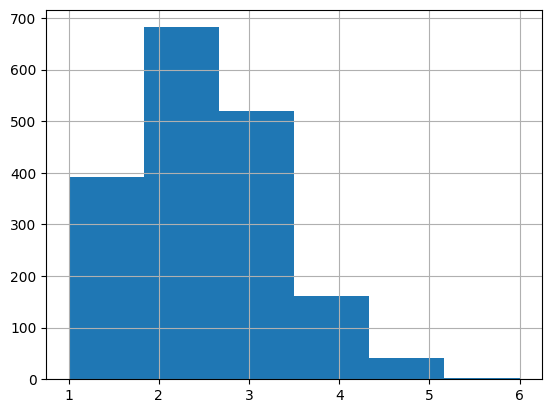

In [40]:
print("Гистограмма по количеству комнат (выборка от 1 до 6 комнат)")
df_good_spb_centre["rooms"].hist(bins=6, range=(1, 6))

Из таблицы по данным квартир **в зависимости от количества комнат** следует, что самая недорогая квартира в центре СПб стоит 1,6 млн.р., тогда как по данным исходной отфильтрованной таблицы самая недорогая квартира стоила 0,43 млн.р.</br>
Самый дорогой объект продавался за 17,5 млн.р. (верхняя граница примененного фильтра), что совпадает с данными исходной отфильтрованной таблицы.</br>

Больше всего продано **двухкомнатных квартир**. На втором месте по продажам - трехкомнатные квартиры. Замыкают тройку лидеров однокомнатные квартиры.

#### Центр СПб: оценка по высоте потолков

[В начало](#intro)

Гистограмма по высоте потолков (выборка от 2,5 до 3,4 м)


<AxesSubplot:>

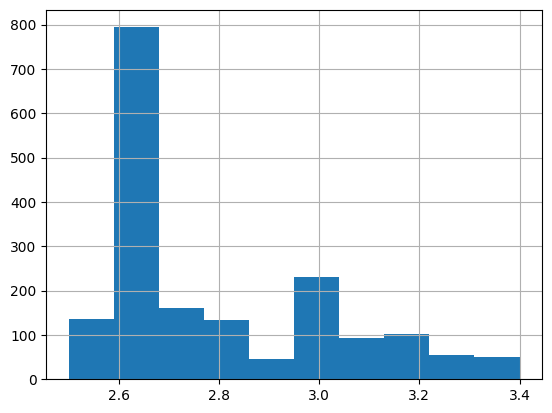

In [41]:
print("Гистограмма по высоте потолков (выборка от 2,5 до 3,4 м)")
df_good_spb_centre["ceiling_height"].hist(bins=10, range=(2.5, 3.4))

Наибольшее количество проданных квартир имеют **потолки высотой** от 2,5 до 3,3 м.

 #### Центр СПб: оценка факторов, имеющих наибольшее влияние на стоимость квартиры 

[В начало](#intro)


Изучим, зависит ли цена от:</br>
- площади, числа комнат, удалённости от центра;</br>
- того, на каком этаже расположена квартира: первом, последнем или другом;</br>
- даты размещения: дня недели, месяца и года.

Матрица корреляции цены, площади, числа комнат, удалённости от центра:
                      last_price  total_area     rooms  city_сenters_nearest
last_price              1.000000    0.731212  0.478132             -0.182196
total_area              0.731212    1.000000  0.804757             -0.231069
rooms                   0.478132    0.804757  1.000000             -0.236878
city_сenters_nearest   -0.182196   -0.231069 -0.236878              1.000000

Проверка зависимости цены и площади.
 Коэффициент корреляции: 0.7312122712024739
 Диаграмма рассеяния:


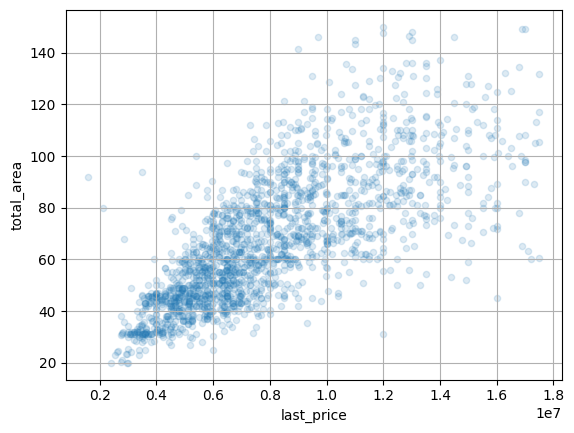


Проверка зависимости цены и числа комнат.
 Коэффициент корреляции: 0.47813235432626244
 Диаграмма размаха:


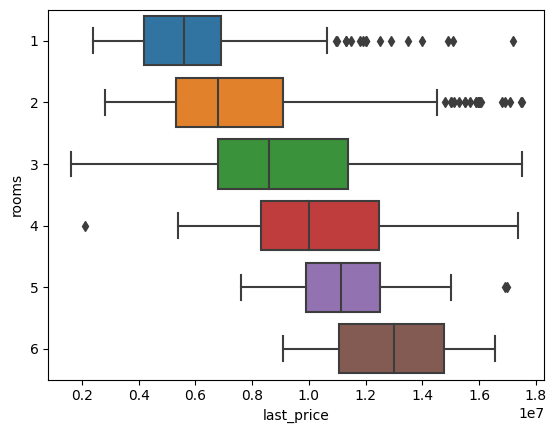


Проверка зависимости цены и удаленности от центра.
 Коэффициент корреляции: -0.18219582347593913
 Диаграмма рассеяния:


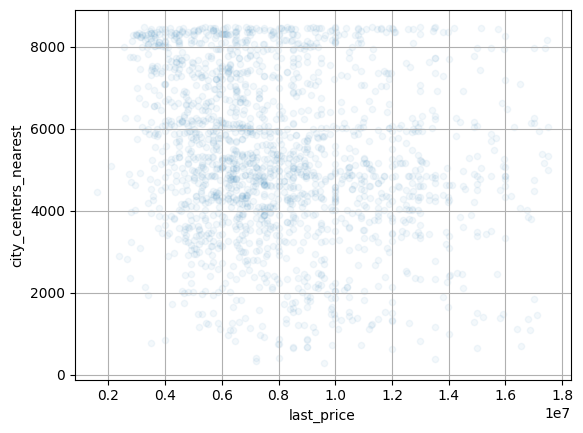



Проверка зависимости цены и этажа (1 - первый, 2 - другой, 3 - последний).
 Коэффициент корреляции: 0.09063143542169973
 Диаграмма размаха:


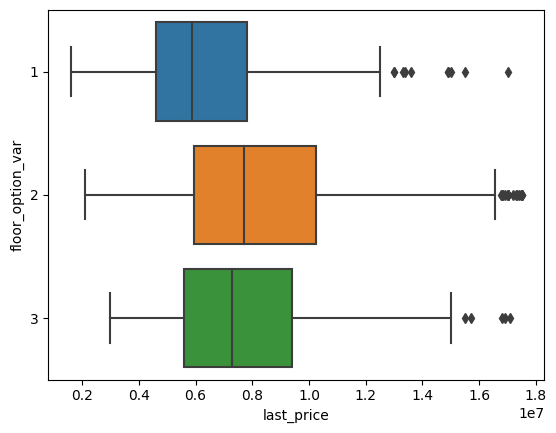



Матрица корреляции цены, дня недели, месяца и года размещения объявления:
            last_price  week_day     month      year
last_price    1.000000 -0.022140  0.000455 -0.070982
week_day     -0.022140  1.000000  0.040317  0.018291
month         0.000455  0.040317  1.000000 -0.210436
year         -0.070982  0.018291 -0.210436  1.000000

Проверка зависимости цены и дня недели размещения объявления.
 Коэффициент корреляции: -0.022140267672220448
 Диаграмма размаха:


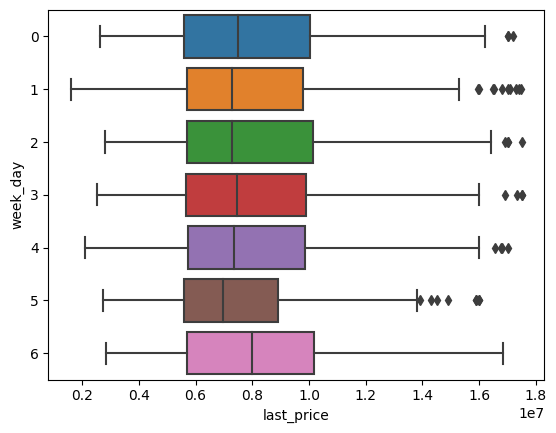


Проверка зависимости цены и месяца размещения объявления.
 Коэффициент корреляции: 0.00045540339797973316
 Диаграмма размаха:


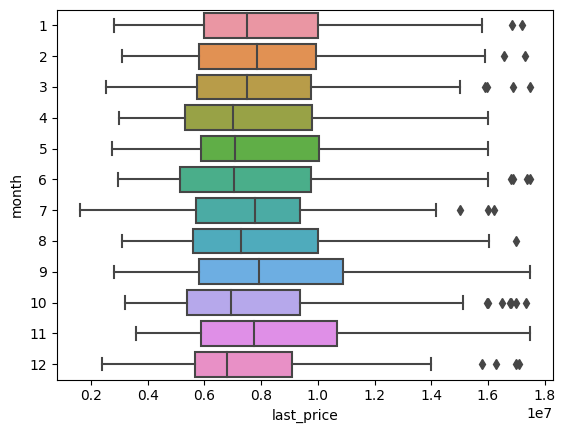


Проверка зависимости цены и года размещения объявления.
 Коэффициент корреляции: -0.07098196097300595
 Диаграмма размаха:


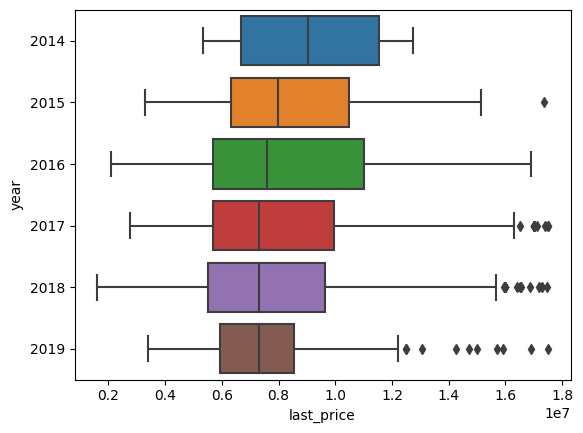

In [42]:
print("Матрица корреляции цены, площади, числа комнат, удалённости от центра:")
df_good_one_spb = df_good_spb_centre.loc[:, ['last_price', 'total_area', 'rooms', 'city_сenters_nearest']]
print(df_good_one_spb.corr())
print()
print('Проверка зависимости цены и площади.\n Коэффициент корреляции:', df_good_spb_centre['last_price'].corr(df_good_spb_centre['total_area']))
print(' Диаграмма рассеяния:')
df_good_spb_centre.plot(x='last_price', y='total_area', kind='scatter', alpha=0.15, grid=True)
plt.show()
print()
print('Проверка зависимости цены и числа комнат.\n Коэффициент корреляции:', df_good_spb_centre['last_price'].corr(df_good_spb_centre['rooms']))
print(' Диаграмма размаха:')
sns.boxplot(x='last_price', y='rooms', data=df_good_spb_centre, orient="h")
plt.show()
print()
print('Проверка зависимости цены и удаленности от центра.\n Коэффициент корреляции:', df_good_spb_centre['last_price'].corr(df_good_spb_centre['city_сenters_nearest']))
print(' Диаграмма рассеяния:')
df_good_spb_centre.plot(x='last_price', y='city_сenters_nearest', kind='scatter', alpha=0.05, grid=True)
plt.show()

print()
print('=========================================================================================================')
print()

print('Проверка зависимости цены и этажа (1 - первый, 2 - другой, 3 - последний).\n Коэффициент корреляции:', df_good_spb_centre['last_price'].corr(df_good_spb_centre['floor_option_var']))
print(' Диаграмма размаха:')
sns.boxplot(x='last_price', y='floor_option_var', data=df_good_spb_centre, orient="h")
plt.show()

print()
print('=========================================================================================================')
print()

print("Матрица корреляции цены, дня недели, месяца и года размещения объявления:")
df_good_three_spb = df_good_spb_centre.loc[:, ['last_price', 'week_day', 'month', 'year']]
print(df_good_three_spb.corr())
print()
print('Проверка зависимости цены и дня недели размещения объявления.\n Коэффициент корреляции:', df_good_spb_centre['last_price'].corr(df_good_spb_centre['week_day']))
print(' Диаграмма размаха:')
sns.boxplot(x='last_price', y='week_day', data=df_good_spb_centre, orient="h")
plt.show()
print()
print('Проверка зависимости цены и месяца размещения объявления.\n Коэффициент корреляции:', df_good_spb_centre['last_price'].corr(df_good_spb_centre['month']))
print(' Диаграмма размаха:')
sns.boxplot(x='last_price', y='month', data=df_good_spb_centre, orient="h")
plt.show()
print()
print('Проверка зависимости цены и года размещения объявления.\n Коэффициент корреляции:', df_good_spb_centre['last_price'].corr(df_good_spb_centre['year']))
print(' Диаграмма размаха:')
sns.boxplot(x='last_price', y='year', data=df_good_spb_centre, orient="h")
plt.show()

В ходе анализа установлено, что:</br>
- **цена имеет прямую зависимость от площади квартиры** (коэф. корреляции 0,72): чем больше площадь, тем, как правило, выше цена. Как правило, **цена увеличивается с увеличением количества комнат** (наблюдаем из диаграммы размаха по значениям медиан, хотя коэф. корреляции для этого параметра всего 0,46). **Цена имеет слабую отрицательную зависимость от удаленности от центра** (коэф. корреляции -0,16);</br>
- как правило, **квартиры на первом этаже стоят дешевле**, чем "в середине дома" и на крайнем этаже - видно по диаграмме размаха, хотя по коэффициенту корреляции этого не скажешь (равен 0,11);</br>
- исходя из абсолютных значений коэффициентов корреляции (менее трех сотых), нет существенной зависимости между ценой и датой размещения объявления. Однако из диаграмм размаха можно заключить, что квартиры, объявления о продаже которых были поданы **в восересенье**, - стоят дороже остальных; объявления, поданные **в феврале, апреле, октябре и декабре** - дешевле остальных; квартиры, объявления по которым публиковались **в 2015 и 2019 годах** - также стоили несколько дешевле остальных.</br>

Выводы по центру Санкт-Петербурга **в целом совпадают с выводами по исходной таблице**.</br>
**Исключения**:</br>
- стоимость квартир в Петербурге, как правило, выше, чем в других населенных пунктах исследуемой таблицы;</br>
- для Петербурга характерно, что цена квартир на верхних этажах выше, чем на остальных (возможная причина - недостаток света в густой застройке многоэтажными домами);</br>
- есть некоторые отличия в стоимости объявлений по дням недели, месяцам и годам.

## Общий вывод
[В начало](#intro)

**ЧТО СДЕЛАНО НА ЭТАПЕ ПРЕДОБРАБОТКИ ДАННЫХ**</br>

Исходный датафрейм представлял собой таблицу из 21 столбца и 23699 строки (считая нулевую).</br>
Для ряда значений автоматически определенный тип был неверен (например, даты публикации объявлений в столбце "first_day_exposition" должны быть в формате дата/время, а не строками).
Имелись столбцы с пропусками данных и значения, правдоподобность которых вызывала сомнения (например, минимальное количество комнат - 0).</br>
Сделано предположение, что отсутствие данных в столбце balcony в отдельных квартирах означает, что балконов там просто нет - пропуски заменили нулями. Аналогичное предположение сделали и для ячеек столбца is_apartment: пропуски также заменили нулями. Для того, чтобы в дальнейшем исследовании не потерять большой массив информации из-за отсутствия данных во второстепенном столбце ceiling_height, заменяем пропуски в этом столбце медианным значением высоты потолков по имеющимся данным. Считаем, что для остальных столбцов замена пропусков, либо удаление строк с пропусками, на данном этапе была нецелесообразна: можно "не угадать" с корректными значениями.</br>
Оценили автоматически определенные типы данных в столбцах таблицы, переопределили типы данных в стобцах first_day_exposition, is_apartment, balcony. Для столбцов floors_total, parks_around_3km, ponds_around_3km, days_exposition оставлен прежний (автоопределенный) тип данных, поскольку переопределение типа при наличии пропусков в данных NaN вызовет ошибку.</br>
Добавили в датафрейм столбцы с данными: о цене квадратного метра (price_per_square_meter); публикации объявления: день недели (week_day), месяц (month), год (year); варианте этажа первый / последний / другой (floor_option); отношения жилой площади к общей площади (living_ratio) и отношения жилой площади к площади кухни (kitchen_ratio).</br>

В ходе **оценки данных по площади, цене, количеству комнат, высоте потолков** установлено:</br>
**А)**</br>
Самая маленькая квартира имеет общую площадь 12 кв.м. и стоит 2,4 млн.р. Квартира эта однокомнатная с высотой потолков 2,55 м. Есть квартиры и больше по площади, но при этом дешевле.</br>
Самый просторный пентхауз расположен на 25-м этаже. Он в 75 раз крупнее и в 175 раз дороже самой скромной квартиры - имеет площадь 900 кв.м. и стоит 420,0 млн.р. В этом пентхаузе 12 комнат с потоками 2,8 м.</br>
Наибольшее количество квартир имеет площадь от 20 до 150 кв.м.</br>
**Б)**</br>
Самая недорогая квартира стоит 12 190 р. и имеет общую площадь 109 кв.м. (2 комнаты, потолки 2,75 м) - очевидно, что в указании цены допущена ошибка (возможно, истиная цена 12,19 млн.р.). Второе место по минимальной цене делят две квартиры за 430 тыс. р. с площадями 30,4 и 54,0 кв.м., (1 и 2 комнатная, о высоте потолков данных нет).</br>
Самый дорогой объект (пентхауз на 10-м этаже) продавался за 763 млн.р.: имел площадь 400 кв.м., 7 комнат, но о высоте потолков сведений нет.</br>
Цена наибольшего количества квартир находится в диапазоне от 0,43 до 15 млн.р.</br>
**В)**</br>
Почти для двух сотен квартир (менее 1 % от числа всех квартир) указано, что количество комнат равно нулю. Тем не менее, поскольку площадь таких квартир варьируется в широком диапазоне от полутора десятков до нескольких сотен кв.м., то заменять значения нуля в количестве комнат чем-то иным не будем (бывают квартиры и 30 кв.м., но двухкомнатные, а бывают и 40 кв.м., но однокомнатные). Цены для квартир с количеством комнат "ноль" также существенно отличаются: от 945 750 р. до 71 000 000 р.</br>
Из таблицы, в которой данные по количеству комнат "1" и более, самая недорогая квартира стоит 12 190 р. и имеет общую площадь 109 кв.м. (2 комнаты, потолки 2,75 м) - очевидно, что в указании цены допущена ошибка (возможно, истинная цена 12,19 млн.р.). Второе место по минимальной цене делят две квартиры за 430 тыс. р. с площадями 30,4 и 54,0 кв.м., (1 и 2 комнатная, о высоте потолков данных нет).</br>
Самый дорогой объект (пентхауз на 10-м этаже) продавался за 763 млн.р.: имел площадь 400 кв.м., 7 комнат, о высоте потолков сведений нет.</br>
Больше всего продано одно-, двух- и трехкомнатных квартир. Причем количество продаж одно- и двухкомнатных объектов практически одинаковое. Четырех-, пяти- и шестикомнатных квартир продается мало. Квартиры, с числом комнат более 6 - уникальные предложения.</br>
**Г)**</br>
Отметим, что в исходном датафрейме для 9195 случаев высоту потолков не указали: наше решение о замене пропусков медианой позволило сохранить для дальнейшей обработки 38,8% от всех квартир датафрейма.</br>
Очевидно, что в исходной таблице имеются недостоверные значения по высоте потолков (min = 1 м, max = 100 м.). Кроме того, у части значений произошло смещение разрядности. Так, например: для трехкомнатной квартиры стоимостью 2,9 млн.р. указана высота потолков в 32 м, а должно быть 3,2 м.</br>
После обработки значений высоты потолков (для случаев менее 2 м - заменой медианой; для случаев более 20 м - корректировкой разрядности с десятков до единиц), отмечаем, что самая невысокая (2,2 м) квартира стоит 1,4 млн.р. и имеет общую площадь 22,2 кв.м. (однокомнатная). Высота потолков самого высокого объекта с высотой потолков в 8,3 м (однокомнатная квартира за 5,65 млн.р. площадью 45 кв.м) - вероятнее всего недостоверна.</br>
Наибольшее количество проданных квартир имеют потолки высотой от 2,5 до 3,4 м.</br>

Количество квартир, для которых в таблице не указано количество дней, за которое квартира была продана: 3181 штук, что составляет 13,42% от всех квартир.</br>
Для квартир, у которых **период размещения объявления** указан, самый длительный период размещения объявления в 1580 дней зарегистрирован для двухкомнатной квартиры в д. Новое Девяткино площадью 48,2 кв.м. стоимостью 3,5 млн.р. с 3 балконами и высотой потолков 2,5 м. Квартира-рекордсмен по быстроте продажи (продана за 1 день): двухкомнатная в Санкт-Петербурге площадью 49,9 кв.м. стоимостью 4,0 млн.р. без балкона с высотой потолков 2,5 м.</br>
Среднее время размещения объявления - 180,9 дней, медиана для времени размещения - 95,0 дней. То обстоятельство, что медиана почти в 2 раза меньше среднего свидетельствует о значительном искажении статистики за счет выбросов с очень большой продолжительностью продажи.</br>
Обычно продажа занимает до полугода (150-180 дней).</br>
Если объявление снято в первые 1,5-2 месяца (50-60 дней), то можно считать, что продажи прошли очень быстро, а когда объявление висит больше года - это означает, что объект продавался необычно долго (для определенности считаем продажи длительностью 13 и более месяцев - долгими).</br>

Исходный датафрейм содержал объекты, информация по которым могла значительно исказить усредненные результаты.</br>
Для дальнейшего исследования **создали новый датафрейм**, в который попали только те значения из исходного, которые посчитали наиболее характерными - включили в новый датафрейм все строки, для которых **одновременно выполнялись следующие условия**:</br>
- общая площадь находится в пределах от 20 до 150 кв.м.;</br>
- цена продажи: от 0,43 до 15,00 млн.р.;</br>
- количество комнат: от 1 до 6;</br>
- высота потолков: от 2,5 до 3,4 м;</br>
- время продажи: от 1 до 395 дней.</br>
После исключения редких значений и выбросов мы получили новую таблицу из данных для 16855 квартир исходной таблицы. В нашей выборке **осталось 71.12% от всех квартир исходного датафрейма**, но качество этих данных лучше.</br>
</br>
</br>


**ИТОГИ ИССЛЕДОВАНИЯ - ОТВЕТЫ НА ПОСТАВЛЕННЫЕ ВОПРОСЫ**

----------------------------------------------------------------------------------------------------------------
**1) Есть ли зависимость между ценой квартиры и**</br>
- площадью,</br> 
- числа комнат,</br>
- удалённости от центра,</br> 
- этажа (первый, последний, другой),</br>
- даты размещения (дня недели, месяца и года)?</br>

**Установлено, что:**
- **цена имеет прямую зависимость от площади квартиры** (коэф. корреляции 0,75): чем больше площадь, тем, как правило, выше цена. Как правило, **цена увеличивается с увеличением количества комнат** (наблюдаем из диаграммы размаха по значениям медиан, хотя коэф. корреляции для этого параметра всего 0,47). **Цена имеет слабую отрицательную зависимость от удаленности от центра** (коэф. корреляции -0,35);</br>
- как правило, **квартиры на первом и последнем этажах стоят дешевле**, чем "в середине дома" - видно по диаграмме размаха, хотя по коэффициенту корреляции этого не скажешь (равен 0,05);</br>
- исходя из абсолютных значений коэффициентов корреляции (менее двух сотых), нет существенной зависимости между ценой и датой размещения объявления. Однако из диаграмм размаха можно заключить, что квартиры, объявления о продаже которых были поданы **в субботу**, - стоят чуть дороже остальных; объявления, поданные **в июне** - несколько дешевле остальных; квартиры, объявления по которым публиковались **в 2016...2018 годах** - также стоили дешевле остальных.

----------------------------------------------------------------------------------------------------------------

**2) Выбрать 10 населённых пунктов с наибольшим числом объявлений, посчитать среднюю цену квадратного метра в этих населённых пунктах и выделить населённые пункты с самой высокой и низкой стоимостью жилья.**</br>

Найдены **10 населенных пунктов с самым большим количеством объявлений о продаже квартир**: 'Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'Колпино', 'посёлок Парголово', 'Пушкин', 'деревня Кудрово', 'Гатчина', 'Выборг'.</br>
Самая высокая **средняя цена за квадратный метр** в Санкт-Петербурге (106,2 тыс.р./кв.м), самая низкая - в Выборге (56,9 тыс.р./кв.м).</br>
**Самая дорогая** квартира в Санкт-Петербурге (17,50 млн.р. - верхняя граница примененного фильтра), **самая дешевая** - в Выборге (0,6 млн.р.).</br>

----------------------------------------------------------------------------------------------------------------

**3) Выяснить, какая область входит в центр Санкт-Петербурга на основе графика зависимости цены от удаленности от центра города?**</br>

На основе убывания средней цены в зависимости от удаленности от центра, определено, что **центральная часть города** заканчивается на 8 километре.</br>
При этом на 27 километре также расположены дорогостоящие квартиры.</br>

----------------------------------------------------------------------------------------------------------------

**4) Выделить сегмент квартир в центре Санкт-Петербурга. Проанализировать эту территорию по следующим параметрам: площадь, цена, число комнат, высота потолков. Выделить факторы, которые влияют на стоимость квартиры (площадь, число комнат, этаж, удалённость от центра, дата размещения объявления). Проверить, отличаются ли полученные выводы от выводов по всей базе?**

В ходе **оценки данных по площади, цене, количеству комнат и высоте потолков** установлено:</br>

**А)**</br>
Статус **самой маленькой квартиры** (площадь 20 кв.м. - нижняя граница примененного фильтра) делят сразу три объекта: две однокомнатные стоимостью 2,385 и 2,950 млн.р. и одна двухкомнатная стоимостью 3,000 млн.р. Высота потолков во всех трех случаях 2,65 м (медианное значение).</br>
Статус **самой просторной квартиры** (площадь 150 кв.м. - верхняя граница примененного фильтра) делят две пятикомнатные квартиры стоимостью 10,20 и 12,7 млн.р. , с высотой потолков 3,4 и 3,35 м соответственно.</br>
**Наибольшее количество квартир имеет площадь** от 30 до 120 кв.м.

**Б)**</br>
**Самая недорогая квартира** стоит 1,6 млн.р. и имеет общую площадь 92 кв.м. (3 комнаты, потолки 3 м).</br>
**Самые дорогие объекты** продавались за 17,5 млн.р. (три объекта: две трехкомнатных и одна двухкомнантая квартиры).</br>
**Цена наибольшего количества квартир** находится в диапазоне от 3,0 до 13 млн.р.

**В)**</br>
Из таблицы по данным квартир **в зависимости от количества комнат** следует, что самая недорогая квартира в центре СПб стоит 1,6 млн.р., тогда как по данным исходной отфильтрованной таблицы самая недорогая квартира стоила 0,43 млн.р.</br>
Самый дорогой объект продавался за 17,5 млн.р. (верхняя граница примененного фильтра), что совпадает с данными исходной отфильтрованной таблицы.</br>
Больше всего продано двухкомнатных квартир. На втором месте по продажам - трехкомнатные квартиры. Замыкают тройку лидеров однокомнатные квартиры.

**Г)**</br>
Наибольшее количество проданных квартир имеют **потолки высотой** от 2,5 до 3,3 м.</br>

**Установлено, что:**
- **цена имеет прямую зависимость от площади квартиры** (коэф. корреляции 0,72): чем больше площадь, тем, как правило, выше цена. Как правило, **цена увеличивается с увеличением количества комнат** (наблюдаем из диаграммы размаха по значениям медиан, хотя коэф. корреляции для этого параметра всего 0,46). **Цена имеет слабую отрицательную зависимость от удаленности от центра** (коэф. корреляции -0,16);</br>
- как правило, **квартиры на первом этаже стоят дешевле**, чем "в середине дома" и на крайнем этаже - видно по диаграмме размаха, хотя по коэффициенту корреляции этого не скажешь (равен 0,11);</br>
- исходя из абсолютных значений коэффициентов корреляции (менее трех сотых), нет существенной зависимости между ценой и датой размещения объявления. Однако из диаграмм размаха можно заключить, что квартиры, объявления о продаже которых были поданы **в воскресенье**, - стоят дороже остальных; объявления, поданные **в феврале, апреле, октябре и декабре** - дешевле остальных; квартиры, объявления по которым публиковались **в 2015 и 2019 годах** - также стоили несколько дешевле остальных.</br>

**Выводы по центру Санкт-Петербурга в целом совпадают с выводами по исходной таблице**.</br>
**Исключения**:</br>
- стоимость квартир в Петербурге, как правило, выше, чем в других населенных пунктах исследуемой таблицы;</br>
- для Петербурга характерно, что цена квартир на верхних этажах выше, чем на остальных (возможная причина - недостаток света в густой застройке многоэтажными домами);</br>
- есть некоторые отличия в стоимости объявлений по дням недели, месяцам и годам.
